In [7]:
!pip install matminer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 38.5 MB/s eta 0:00:00


In [8]:
# %% Cell 1: Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from matminer.datasets.dataset_retrieval import (
    load_dataset,
    get_available_datasets,
    get_dataset_num_entries,
    get_dataset_columns,
    get_dataset_description
)
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid", context="notebook")
plt.rcParams['figure.figsize'] = (10, 6)

boltztrap_mp: Effective mass and thermoelectric properties of 8924 compounds in The  Materials Project database that are calculated by the BoltzTraP software package run on the GGA-PBE or GGA+U density functional theory calculation results. The properties are reported at the temperature of 300 Kelvin and the carrier concentration of 1e18 1/cm3.

brgoch_superhard_training: 2574 materials used for training regressors that predict shear and bulk modulus.

castelli_perovskites: 18,928 perovskites generated with ABX combinatorics, calculating gllbsc band gap and pbe structure, and also reporting absolute band edge positions and heat of formation.

citrine_thermal_conductivity: Thermal conductivity of 872 compounds measured experimentally and retrieved from Citrine database from various references. The reported values are measured at various temperatures of which 295 are at room temperature.

dielectric_constant: 1,056 structures with dielectric properties, calculated with DFPT-PBE.

double_perovskites_gap: Band gap of 1306 double perovskites (a_1-b_1-a_2-b_2-O6) calculated using ﻿Gritsenko, van Leeuwen, van Lenthe and Baerends potential (gllbsc) in GPAW.

double_perovskites_gap_lumo: Supplementary lumo data of 55 atoms for the double_perovskites_gap dataset.

elastic_tensor_2015: 1,181 structures with elastic properties calculated with DFT-PBE.

expt_formation_enthalpy: Experimental formation enthalpies for inorganic compounds, collected from years of calorimetric experiments. There are 1,276 entries in this dataset, mostly binary compounds. Matching mpids or oqmdids as well as the DFT-computed formation energies are also added (if any).

expt_formation_enthalpy_kingsbury: Dataset containing experimental standard formation enthalpies for solids. Formation enthalpies were compiled primarily from Kim et al., Kubaschewski, and the NIST JANAF tables (see references). Elements, liquids, and gases were excluded. Data were deduplicated such that each material is associated with a single formation enthalpy value. Refer to Wang et al. (see references) for a complete desciption of the methods used. Materials Project database IDs (mp-ids) were assigned to materials from among computed materials in the Materials Project database (version 2021.03.22) that were 1) not marked 'theoretical', 2) had structures matching at least one ICSD material, and 3) were within 200 meV of the DFT-computed stable energy hull (e_above_hull < 0.2 eV). Among these candidates, we chose the mp-id with the lowest e_above_hull that matched the reported spacegroup (where available).

expt_gap: Experimental band gap of 6354 inorganic semiconductors.

expt_gap_kingsbury: Identical to the matbench_expt_gap dataset, except that Materials Project database IDs (mp-ids) have been associated with each material using the same method as described for the expt_formation_enthalpy_kingsbury dataset. Columns have also been renamed for consistency with the formation enthalpy data.

flla: 3938 structures and computed formation energies from "Crystal Structure Representations for Machine Learning Models of Formation Energies."

glass_binary: Metallic glass formation data for binary alloys, collected from various experimental techniques such as melt-spinning or mechanical alloying. This dataset covers all compositions with an interval of 5 at. % in 59 binary systems, containing a total of 5959 alloys in the dataset. The target property of this dataset is the glass forming ability (GFA), i.e. whether the composition can form monolithic glass or not, which is either 1 for glass forming or 0 for non-full glass forming.

glass_binary_v2: Identical to glass_binary dataset, but with duplicate entries merged. If there was a disagreement in gfa when merging the class was defaulted to 1.

glass_ternary_hipt: Metallic glass formation dataset for ternary alloys, collected from the high-throughput sputtering experiments measuring whether it is possible to form a glass using sputtering. The hipt experimental data are of the Co-Fe-Zr, Co-Ti-Zr, Co-V-Zr and Fe-Ti-Nb ternary systems.

glass_ternary_landolt: Metallic glass formation dataset for ternary alloys, collected from the "Nonequilibrium Phase Diagrams of Ternary Amorphous Alloys,’ a volume of the Landolt– Börnstein collection. This dataset contains experimental measurements of whether it is possible to form a glass using a variety of processing techniques at thousands of compositions from hundreds of ternary systems. The processing techniques are designated in the "processing" column. There are originally 7191 experiments in this dataset, will be reduced to 6203 after deduplicated, and will be further reduced to 6118 if combining multiple data for one composition. There are originally 6780 melt-spinning experiments in this dataset, will be reduced to 5800 if deduplicated, and will be further reduced to 5736 if combining multiple experimental data for one composition.

heusler_magnetic: 1153 Heusler alloys with DFT-calculated magnetic and electronic properties. The 1153 alloys include 576 full, 449 half and 128 inverse Heusler alloys. The data are extracted and cleaned (including de-duplicating) from Citrine.

jarvis_dft_2d: Various properties of 636 2D materials computed with the OptB88vdW and TBmBJ functionals taken from the JARVIS DFT database.

jarvis_dft_3d: Various properties of 25,923 bulk materials computed with the OptB88vdW and TBmBJ functionals taken from the JARVIS DFT database.

jarvis_ml_dft_training: Various properties of 24,759 bulk and 2D materials computed with the OptB88vdW and TBmBJ functionals taken from the JARVIS DFT database.

m2ax: Elastic properties of 223 stable M2AX compounds from "A comprehensive survey of M2AX phase elastic properties" by Cover et al. Calculations are PAW PW91.

matbench_dielectric: Matbench v0.1 test dataset for predicting refractive index from structure. Adapted from Materials Project database. Removed entries having a formation energy (or energy above the convex hull) more than 150meV and those having refractive indices less than 1 and those containing noble gases. Retrieved April 2, 2019. For benchmarking w/ nested cross validation, the order of the dataset must be identical to the retrieved data; refer to the Automatminer/Matbench publication for more details.

matbench_expt_gap: Matbench v0.1 test dataset for predicting experimental band gap from composition alone. Retrieved from Zhuo et al. supplementary information. Deduplicated according to composition, removing compositions with reported band gaps spanning more than a 0.1eV range; remaining compositions were assigned values based on the closest experimental value to the mean experimental value for that composition among all reports. For benchmarking w/ nested cross validation, the order of the dataset must be identical to the retrieved data; refer to the Automatminer/Matbench publication for more details.

matbench_expt_is_metal: Matbench v0.1 test dataset for classifying metallicity from composition alone. Retrieved from Zhuo et al. supplementary information. Deduplicated according to composition, ensuring no conflicting reports were entered for any compositions (i.e., no reported compositions were both metal and nonmetal). For benchmarking w/ nested cross validation, the order of the dataset must be identical to the retrieved data; refer to the Automatminer/Matbench publication for more details.

matbench_glass: Matbench v0.1 test dataset for predicting full bulk metallic glass formation ability from chemical formula. Retrieved from "Nonequilibrium Phase Diagrams of Ternary Amorphous Alloys,’ a volume of the Landolt– Börnstein collection. Deduplicated according to composition, ensuring no compositions were reported as both GFA and not GFA (i.e., all reports agreed on the classification designation). For benchmarking w/ nested cross validation, the order of the dataset must be identical to the retrieved data; refer to the Automatminer/Matbench publication for more details.

matbench_jdft2d: Matbench v0.1 test dataset for predicting exfoliation energies from crystal structure (computed with the OptB88vdW and TBmBJ functionals). Adapted from the JARVIS DFT database. For benchmarking w/ nested cross validation, the order of the dataset must be identical to the retrieved data; refer to the Automatminer/Matbench publication for more details.

matbench_log_gvrh: Matbench v0.1 test dataset for predicting DFT log10 VRH-average shear modulus from structure. Adapted from Materials Project database. Removed entries having a formation energy (or energy above the convex hull) more than 150meV and those having negative G_Voigt, G_Reuss, G_VRH, K_Voigt, K_Reuss, or K_VRH and those failing G_Reuss <= G_VRH <= G_Voigt or K_Reuss <= K_VRH <= K_Voigt and those containing noble gases. Retrieved April 2, 2019. For benchmarking w/ nested cross validation, the order of the dataset must be identical to the retrieved data; refer to the Automatminer/Matbench publication for more details.

matbench_log_kvrh: Matbench v0.1 test dataset for predicting DFT log10 VRH-average bulk modulus from structure. Adapted from Materials Project database. Removed entries having a formation energy (or energy above the convex hull) more than 150meV and those having negative G_Voigt, G_Reuss, G_VRH, K_Voigt, K_Reuss, or K_VRH and those failing G_Reuss <= G_VRH <= G_Voigt or K_Reuss <= K_VRH <= K_Voigt and those containing noble gases. Retrieved April 2, 2019. For benchmarking w/ nested cross validation, the order of the dataset must be identical to the retrieved data; refer to the Automatminer/Matbench publication for more details.

matbench_mp_e_form: Matbench v0.1 test dataset for predicting DFT formation energy from structure. Adapted from Materials Project database. Removed entries having formation energy more than 2.5eV and those containing noble gases. Retrieved April 2, 2019. For benchmarking w/ nested cross validation, the order of the dataset must be identical to the retrieved data; refer to the Automatminer/Matbench publication for more details.

matbench_mp_gap: Matbench v0.1 test dataset for predicting DFT PBE band gap from structure. Adapted from Materials Project database. Removed entries having a formation energy (or energy above the convex hull) more than 150meV and those containing noble gases. Retrieved April 2, 2019. For benchmarking w/ nested cross validation, the order of the dataset must be identical to the retrieved data; refer to the Automatminer/Matbench publication for more details.

matbench_mp_is_metal: Matbench v0.1 test dataset for predicting DFT metallicity from structure. Adapted from Materials Project database. Removed entries having a formation energy (or energy above the convex hull) more than 150meV and those containing noble gases. Retrieved April 2, 2019. For benchmarking w/ nested cross validation, the order of the dataset must be identical to the retrieved data; refer to the Automatminer/Matbench publication for more details.

matbench_perovskites: Matbench v0.1 test dataset for predicting formation energy from crystal structure. Adapted from an original dataset generated by Castelli et al. For benchmarking w/ nested cross validation, the order of the dataset must be identical to the retrieved data; refer to the Automatminer/Matbench publication for more details.

matbench_phonons: Matbench v0.1 test dataset for predicting vibration properties from crystal structure. Original data retrieved from Petretto et al. Original calculations done via ABINIT in the harmonic approximation based on density functional perturbation theory. Removed entries having a formation energy (or energy above the convex hull) more than 150meV. For benchmarking w/ nested cross validation, the order of the dataset must be identical to the retrieved data; refer to the Automatminer/Matbench publication for more details.

matbench_steels: Matbench v0.1 test dataset for predicting steel yield strengths from chemical composition alone. Retrieved from Citrine informatics. Deduplicated. For benchmarking w/ nested cross validation, the order of the dataset must be identical to the retrieved data; refer to the Automatminer/Matbench publication for more details.

mp_all_20181018: A complete copy of the Materials Project database as of 10/18/2018. mp_all files contain structure data for each material while mp_nostruct does not.

mp_nostruct_20181018: A complete copy of the Materials Project database as of 10/18/2018. mp_all files contain structure data for each material while mp_nostruct does not.

phonon_dielectric_mp: Phonon (lattice/atoms vibrations) and dielectric properties of 1296 compounds computed via ABINIT software package in the harmonic approximation based on density functional perturbation theory.

piezoelectric_tensor: 941 structures with piezoelectric properties, calculated with DFT-PBE.

ricci_boltztrap_mp_tabular: Ab-initio electronic transport database for inorganic materials. Complex multivariable BoltzTraP simulation data is condensed down into tabular form of two main motifs: average eigenvalues at set moderate carrier concentrations and temperatures, and optimal values among all carrier concentrations and temperatures within certain ranges. Here are reported the average of the eigenvalues of conductivity effective mass (mₑᶜᵒⁿᵈ), the Seebeck coefficient (S), the conductivity (σ), the electronic thermal conductivity (κₑ), and the Power Factor (PF) at a doping level of 10¹⁸ cm⁻³ and at a temperature of 300 K for n- and p-type. Also, the maximum values for S, σ, PF, and the minimum value for κₑ chosen among the temperatures [100, 1300] K, the doping levels [10¹⁶, 10²¹] cm⁻³, and doping types are reported. The properties that depend on the relaxation time are reported divided by the constant value 10⁻¹⁴. The average of the eigenvalues for all the properties at all the temperatures, doping levels, and doping types are reported in the tables for each entry. Data is indexed by materials project id (mpid)

steel_strength: 312 steels with experimental yield strength and ultimate tensile strength, extracted and cleaned (including de-duplicating) from Citrine.

superconductivity2018: Dataset of ~16,000 experimental superconductivity records (critical temperatures) from Stanev et al., originally from the Japanese National Institute for Materials Science. Does not include structural data. Includes ~300 measurements from materials found without superconductivity (Tc=0). No modifications were made to the core dataset, aside from basic file type change to json for (un)packaging with matminer. Reproduced under the Creative Commons 4.0 license, which can be found here: http://creativecommons.org/licenses/by/4.0/.

tholander_nitrides: A challenging data set for quantum machine learning containing a diverse set of 12.8k polymorphs in the Zn-Ti-N, Zn-Zr-N and Zn-Hf-N chemical systems. The phase diagrams of the Ti-Zn-N, Zr-Zn-N, and Hf-Zn-N systems are determined using large-scale high-throughput density functional calculations (DFT-GGA) (PBE). In total 12,815 relaxed structures are shared alongside their energy calculated using the VASP DFT code. The High-Throughput Toolkit was used to manage the calculations. Data adapted and deduplicated from the original data on Zenodo at https://zenodo.org/record/5530535#.YjJ3ZhDMJLQ, published under MIT licence. Collated from separate files of chemical systems and deduplicated according to identical structures matching ht_ids. Prepared in collaboration with Rhys Goodall.

ucsb_thermoelectrics: Database of ~1,100 experimental thermoelectric materials from UCSB aggregated from 108 source publications and personal communications. Downloaded from Citrine. Source UCSB webpage is http://www.mrl.ucsb.edu:8080/datamine/thermoelectric.jsp. See reference for more information on original data aggregation. No duplicate entries are present, but each src may result in multiple measurements of the same materials' properties at different temperatures or conditions.

wolverton_oxides: 4,914 perovskite oxides containing composition data, lattice constants, and formation + vacancy formation energies. All perovskites are of the form ABO3. Adapted from a dataset presented by Emery and Wolverton.



In [9]:
# %% Cell 2: Retrieve and Display Dataset Info for All matminer Datasets
def retrieve_datasets_info():
    summary = []
    dataset_names = get_available_datasets()
    for dataset_name in dataset_names[0:2]:
        expected_entries = get_dataset_num_entries(dataset_name)
        expected_columns = get_dataset_columns(dataset_name)
        dataset_description = get_dataset_description(dataset_name)
        try:
            df = load_dataset(dataset_name, download_if_missing=True)
            actual_entries = len(df)
            actual_columns = list(df.columns)
        except Exception as e:
            print(f"⚠️ Failed to load {dataset_name}: {e}")
            actual_entries = None
            actual_columns = None
        summary.append({
            "Dataset": dataset_name,
            "Expected Entries": expected_entries,
            "Actual Entries": actual_entries,
            "Expected Columns": ", ".join(expected_columns),
            "Actual Columns": ", ".join(actual_columns) if actual_columns else "N/A",
            "Description": dataset_description
        })
    return pd.DataFrame(summary)

df_summary = retrieve_datasets_info()
print("\nSummary of Available matminer Datasets:\n")
print(df_summary.to_string(index=False))

boltztrap_mp: Effective mass and thermoelectric properties of 8924 compounds in The  Materials Project database that are calculated by the BoltzTraP software package run on the GGA-PBE or GGA+U density functional theory calculation results. The properties are reported at the temperature of 300 Kelvin and the carrier concentration of 1e18 1/cm3.

brgoch_superhard_training: 2574 materials used for training regressors that predict shear and bulk modulus.

castelli_perovskites: 18,928 perovskites generated with ABX combinatorics, calculating gllbsc band gap and pbe structure, and also reporting absolute band edge positions and heat of formation.

citrine_thermal_conductivity: Thermal conductivity of 872 compounds measured experimentally and retrieved from Citrine database from various references. The reported values are measured at various temperatures of which 295 are at room temperature.

dielectric_constant: 1,056 structures with dielectric properties, calculated with DFPT-PBE.

double_

Fetching https://ndownloader.figshare.com/files/13297511 in MB: 14.020608MB [00:00, 297.87MB/s]                         


Fetching brgoch_superhard_training.json.gz from https://ndownloader.figshare.com/files/13858931 to /usr/local/lib/python3.11/dist-packages/matminer/datasets/brgoch_superhard_training.json.gz


Fetching https://ndownloader.figshare.com/files/13858931 in MB: 2.51904MB [00:00, 316.59MB/s]                 



Summary of Available matminer Datasets:

                  Dataset  Expected Entries  Actual Entries                                                                                       Expected Columns                                                                                         Actual Columns                                                                                                                                                                                                                                                                                                                                  Description
             boltztrap_mp              8924            8924                                               formula, m_n, m_p, mpid, pf_n, pf_p, s_n, s_p, structure                                               mpid, pf_n, pf_p, s_n, s_p, formula, m_n, m_p, structure Effective mass and thermoelectric properties of 8924 compounds in The  Materials Project data

In [ ]:
# %% Cell 2: Retrieve and Display Dataset Info for All matminer Datasets
def retrieve_datasets_info():
    summary = []
    dataset_names = get_available_datasets()
    for dataset_name in dataset_names[0:2]:
        expected_entries = get_dataset_num_entries(dataset_name)
        expected_columns = get_dataset_columns(dataset_name)
        dataset_description = get_dataset_description(dataset_name)
        try:
            df = load_dataset(dataset_name, download_if_missing=True)
            actual_entries = len(df)
            actual_columns = list(df.columns)
        except Exception as e:
            print(f"⚠️ Failed to load {dataset_name}: {e}")
            actual_entries = None
            actual_columns = None
        summary.append({
            "Dataset": dataset_name,
            "Expected Entries": expected_entries,
            "Actual Entries": actual_entries,
            "Expected Columns": ", ".join(expected_columns),
            "Actual Columns": ", ".join(actual_columns) if actual_columns else "N/A",
            "Description": dataset_description
        })
    return pd.DataFrame(summary)

df_summary = retrieve_datasets_info()
print("\nSummary of Available matminer Datasets:\n")
print(df_summary.to_string(index=False))

boltztrap_mp: Effective mass and thermoelectric properties of 8924 compounds in The  Materials Project database that are calculated by the BoltzTraP software package run on the GGA-PBE or GGA+U density functional theory calculation results. The properties are reported at the temperature of 300 Kelvin and the carrier concentration of 1e18 1/cm3.

brgoch_superhard_training: 2574 materials used for training regressors that predict shear and bulk modulus.

castelli_perovskites: 18,928 perovskites generated with ABX combinatorics, calculating gllbsc band gap and pbe structure, and also reporting absolute band edge positions and heat of formation.

citrine_thermal_conductivity: Thermal conductivity of 872 compounds measured experimentally and retrieved from Citrine database from various references. The reported values are measured at various temperatures of which 295 are at room temperature.

dielectric_constant: 1,056 structures with dielectric properties, calculated with DFPT-PBE.

double_

Fetching https://ndownloader.figshare.com/files/13297511 in MB: 14.020608MB [00:00, 297.87MB/s]                         


Fetching brgoch_superhard_training.json.gz from https://ndownloader.figshare.com/files/13858931 to /usr/local/lib/python3.11/dist-packages/matminer/datasets/brgoch_superhard_training.json.gz


Fetching https://ndownloader.figshare.com/files/13858931 in MB: 2.51904MB [00:00, 316.59MB/s]                 



Summary of Available matminer Datasets:

                  Dataset  Expected Entries  Actual Entries                                                                                       Expected Columns                                                                                         Actual Columns                                                                                                                                                                                                                                                                                                                                  Description
             boltztrap_mp              8924            8924                                               formula, m_n, m_p, mpid, pf_n, pf_p, s_n, s_p, structure                                               mpid, pf_n, pf_p, s_n, s_p, formula, m_n, m_p, structure Effective mass and thermoelectric properties of 8924 compounds in The  Materials Project data

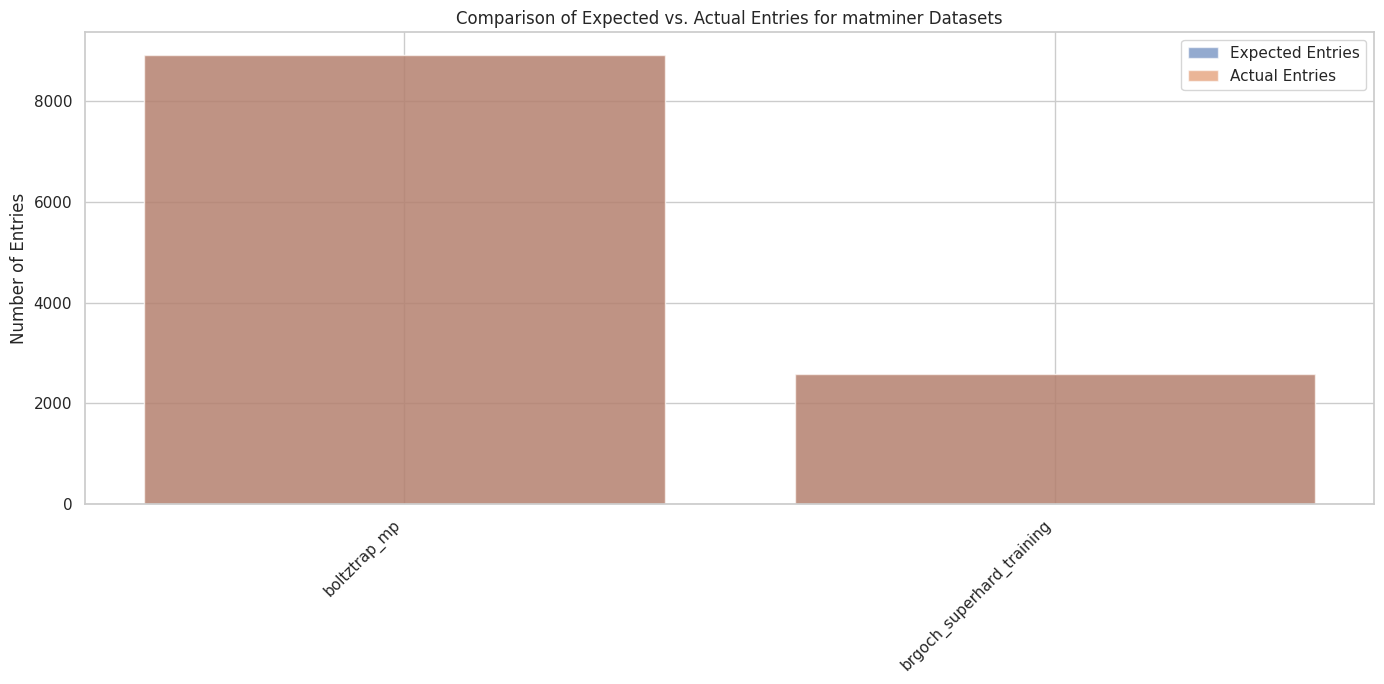

In [10]:
# %% Cell 3: Plot Comparison of Expected vs Actual Entries for All Datasets
def plot_dataset_entries(df_summary):
    valid_df = df_summary.dropna(subset=["Actual Entries"]).copy()
    valid_df = valid_df.sort_values("Expected Entries", ascending=False)
    plt.figure(figsize=(14, 7))
    plt.bar(valid_df["Dataset"], valid_df["Expected Entries"], alpha=0.6, label="Expected Entries")
    plt.bar(valid_df["Dataset"], valid_df["Actual Entries"], alpha=0.6, label="Actual Entries")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Number of Entries")
    plt.title("Comparison of Expected vs. Actual Entries for matminer Datasets")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_dataset_entries(df_summary)

In [11]:
# %% Cell 4: Load Double Perovskites Gap Dataset
df_perovskites = load_dataset("double_perovskites_gap", download_if_missing=True)
print("Double Perovskites Gap Dataset Shape:", df_perovskites.shape)
print(df_perovskites.head(10))

Fetching double_perovskites_gap.json.gz from https://ndownloader.figshare.com/files/13309157 to /usr/local/lib/python3.11/dist-packages/matminer/datasets/double_perovskites_gap.json.gz


Fetching https://ndownloader.figshare.com/files/13309157 in MB: 0.020479999999999998MB [00:00, 19.43MB/s]     

Double Perovskites Gap Dataset Shape: (1306, 6)
      formula a_1 b_1 a_2 b_2  gap gllbsc
0  AgNbLaAlO6  Ag  Nb  La  Al    4.164543
1  AgNbLaGaO6  Ag  Nb  La  Ga    4.454629
2  AgNbLaInO6  Ag  Nb  La  In    4.192522
3  AgNbMgTiO6  Ag  Nb  Mg  Ti    3.963857
4  AgNbSnTiO6  Ag  Nb  Sn  Ti    2.881239
5   AgNbYAlO6  Ag  Nb   Y  Al    3.958215
6  AgTaAgNbO6  Ag  Ta  Ag  Nb    3.367340
7  AgTaBaSnO6  Ag  Ta  Ba  Sn    4.115528
8  AgTaBaTiO6  Ag  Ta  Ba  Ti    3.651875
9  AgTaCaGeO6  Ag  Ta  Ca  Ge    4.596742


In [12]:
# %% Cell 5: Load Steel Strength Dataset
df_steel = load_dataset("steel_strength", download_if_missing=True)
print("Steel Strength Dataset Shape:", df_steel.shape)
print(df_steel.head(10))

Fetching steel_strength.json.gz from https://ndownloader.figshare.com/files/13354691 to /usr/local/lib/python3.11/dist-packages/matminer/datasets/steel_strength.json.gz


Fetching https://ndownloader.figshare.com/files/13354691 in MB: 0.016384MB [00:00,  7.91MB/s]                 

Steel Strength Dataset Shape: (312, 17)
                                             formula     c    mn    si     cr  \
0  Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...  0.02  0.05  0.05   0.01   
1  Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....  0.18  0.01  0.01  13.44   
2  Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....  0.00  0.01  0.01   8.67   
3  Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...  0.01  0.05  0.05   0.01   
4  Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...  0.01  0.05  0.05   0.01   
5  Fe0.636C0.00881Mn0.000203Si0.00972Cr0.135Ni0.0...  0.19  0.02  0.49  12.56   
6  Fe0.644Mn0.000521Si0.00102Cr0.000110Ni0.177Mo0...  0.00  0.05  0.05   0.01   
7  Fe0.646C0.00479Mn0.00597Si0.00492Cr0.135Ni0.00...  0.10  0.57  0.24  12.19   
8  Fe0.648C0.000453Mn0.0000991Si0.0386Cr0.183Ni0....  0.01  0.01  1.99  17.50   
9  Fe0.648C0.00751Mn0.000103Si0.000201Cr0.158Ni0....  0.16  0.01  0.01  14.56   

      ni    mo     v     n    nb     co     w    al    ti  yield str

In [13]:
# %% Cell 6: Preprocess Double Perovskites Dataset - Drop NaNs and Select Numeric Columns
df_perovskites_clean = df_perovskites.dropna().copy()
numeric_cols_perovskites = df_perovskites_clean.select_dtypes(include=[np.number]).columns.tolist()
print("Double Perovskites Numeric Columns:", numeric_cols_perovskites)
df_perovskites_numeric = df_perovskites_clean[numeric_cols_perovskites]
print("Double Perovskites Numeric Data Shape:", df_perovskites_numeric.shape)

Double Perovskites Numeric Columns: ['gap gllbsc']
Double Perovskites Numeric Data Shape: (1306, 1)


In [14]:
# %% Cell 7: Preprocess Steel Strength Dataset - Drop NaNs and Select Numeric Columns
df_steel_clean = df_steel.dropna().copy()
numeric_cols_steel = df_steel_clean.select_dtypes(include=[np.number]).columns.tolist()
print("Steel Strength Numeric Columns:", numeric_cols_steel)
df_steel_numeric = df_steel_clean[numeric_cols_steel]
print("Steel Strength Numeric Data Shape:", df_steel_numeric.shape)

Steel Strength Numeric Columns: ['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti', 'yield strength', 'tensile strength', 'elongation']
Steel Strength Numeric Data Shape: (303, 16)


In [15]:
# %% Cell 8: Standardize Data for Double Perovskites
scaler_perov = StandardScaler()
X_perov = scaler_perov.fit_transform(df_perovskites_numeric)
print("Standardized Double Perovskites Data Shape:", X_perov.shape)

Standardized Double Perovskites Data Shape: (1306, 1)


In [16]:
# %% Cell 9: Standardize Data for Steel Strength
scaler_steel = StandardScaler()
X_steel = scaler_steel.fit_transform(df_steel_numeric)
print("Standardized Steel Strength Data Shape:", X_steel.shape)

Standardized Steel Strength Data Shape: (303, 16)


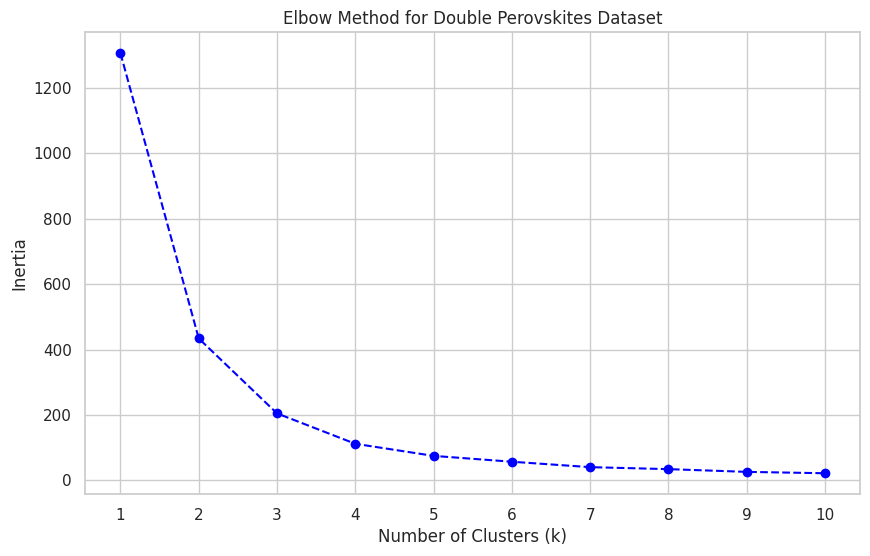

In [17]:
# %% Cell 10: Determine Optimal Number of Clusters for Double Perovskites using Elbow Method (KMeans)
inertias_perov = []
K_range_perov = range(1, 11)
for k in K_range_perov:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_perov)
    inertias_perov.append(kmeans.inertia_)
plt.figure()
plt.plot(K_range_perov, inertias_perov, marker='o', linestyle='--', color='blue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Double Perovskites Dataset")
plt.xticks(K_range_perov)
plt.show()

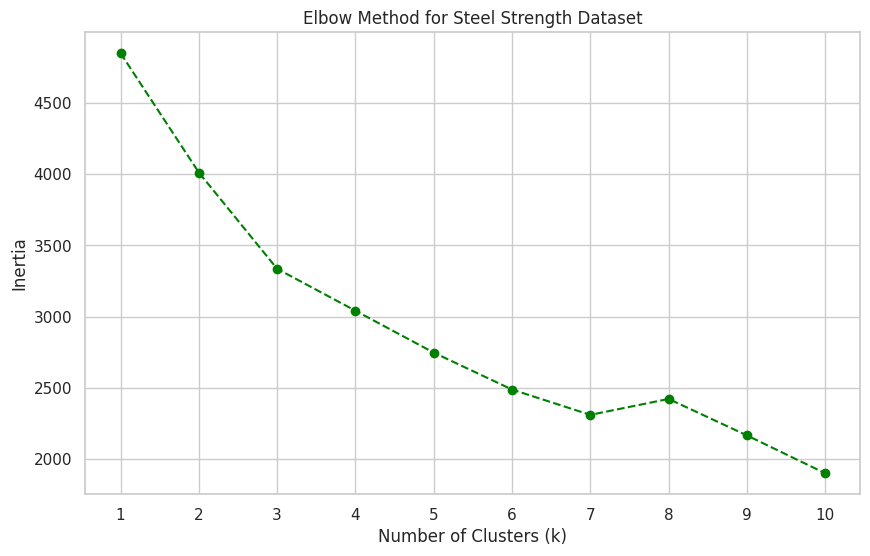

In [18]:
# %% Cell 11: Determine Optimal Number of Clusters for Steel Strength using Elbow Method (KMeans)
inertias_steel = []
K_range_steel = range(1, 11)
for k in K_range_steel:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_steel)
    inertias_steel.append(kmeans.inertia_)
plt.figure()
plt.plot(K_range_steel, inertias_steel, marker='o', linestyle='--', color='green')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Steel Strength Dataset")
plt.xticks(K_range_steel)
plt.show()

In [19]:
# %% Cell 12: Apply KMeans Clustering on Double Perovskites Dataset with k=3 (Example)
kmeans_perov = KMeans(n_clusters=3, random_state=42)
labels_perov = kmeans_perov.fit_predict(X_perov)
print("KMeans Cluster Labels for Double Perovskites:", np.unique(labels_perov))
df_perovskites_clean['Cluster_KMeans'] = labels_perov

KMeans Cluster Labels for Double Perovskites: [0 1 2]


In [20]:

# %% Cell 13: Apply KMeans Clustering on Steel Strength Dataset with k=3 (Example)
kmeans_steel = KMeans(n_clusters=3, random_state=42)
labels_steel = kmeans_steel.fit_predict(X_steel)
print("KMeans Cluster Labels for Steel Strength:", np.unique(labels_steel))
df_steel_clean['Cluster_KMeans'] = labels_steel

KMeans Cluster Labels for Steel Strength: [0 1 2]


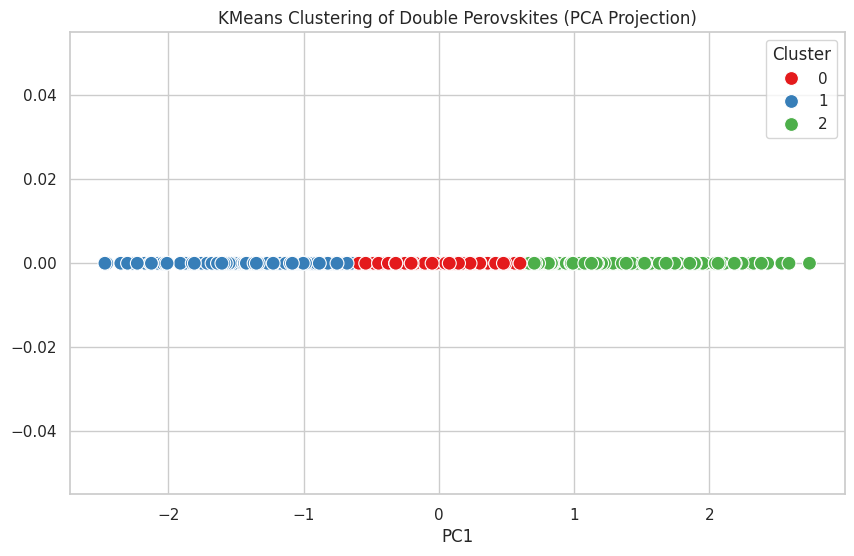

In [22]:
# %% Cell 14: PCA for Visualization of Clusters in Double Perovskites Dataset
pca_perov = PCA(n_components=1) # Change n_components to 1
X_perov_pca = pca_perov.fit_transform(X_perov)
#Update to reflect the changed n_components to 1
df_perov_pca = pd.DataFrame(X_perov_pca, columns=["PC1"]) # Update columns to ["PC1"]
df_perov_pca["Cluster"] = labels_perov
plt.figure()
#Update scatterplot to use PC1 and a constant value for the y-axis
sns.scatterplot(x="PC1", y=0, hue="Cluster", data=df_perov_pca, palette="Set1", s=100) # Update y to a constant value, e.g., 0
plt.title("KMeans Clustering of Double Perovskites (PCA Projection)")
plt.show()

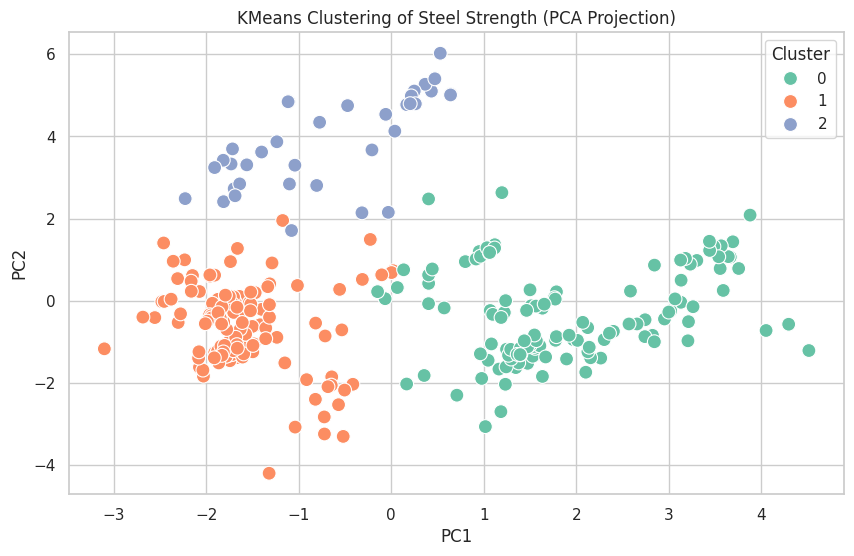

In [23]:
# %% Cell 15: PCA for Visualization of Clusters in Steel Strength Dataset
pca_steel = PCA(n_components=2)
X_steel_pca = pca_steel.fit_transform(X_steel)
df_steel_pca = pd.DataFrame(X_steel_pca, columns=["PC1", "PC2"])
df_steel_pca["Cluster"] = labels_steel
plt.figure()
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df_steel_pca, palette="Set2", s=100)
plt.title("KMeans Clustering of Steel Strength (PCA Projection)")
plt.show()

Silhouette Score for Double Perovskites (KMeans): 0.5546798655736791


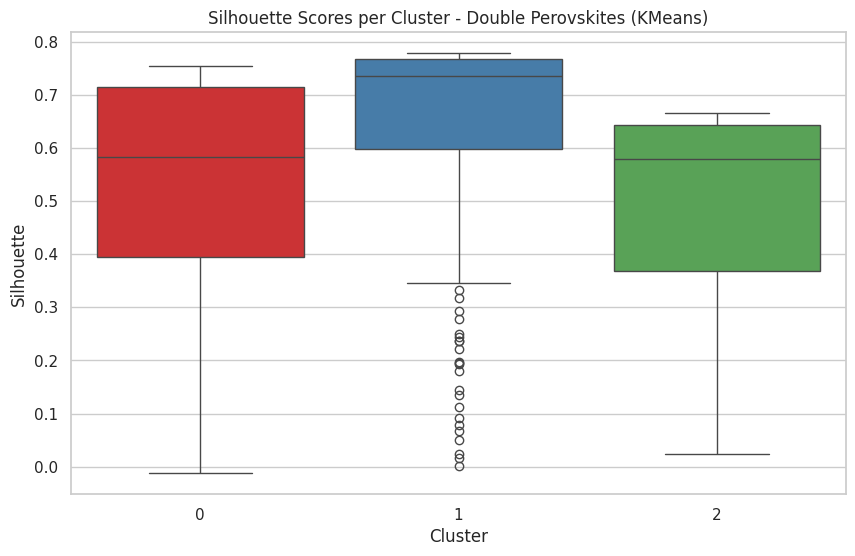

In [24]:
# %% Cell 16: Compute Silhouette Scores for KMeans Clustering on Double Perovskites
sil_score_perov = silhouette_score(X_perov, labels_perov)
print("Silhouette Score for Double Perovskites (KMeans):", sil_score_perov)
sample_sil_perov = silhouette_samples(X_perov, labels_perov)
df_perov_sil = pd.DataFrame({"Silhouette": sample_sil_perov, "Cluster": labels_perov})
plt.figure()
sns.boxplot(x="Cluster", y="Silhouette", data=df_perov_sil, palette="Set1")
plt.title("Silhouette Scores per Cluster - Double Perovskites (KMeans)")
plt.show()

Silhouette Score for Steel Strength (KMeans): 0.2826350885624815


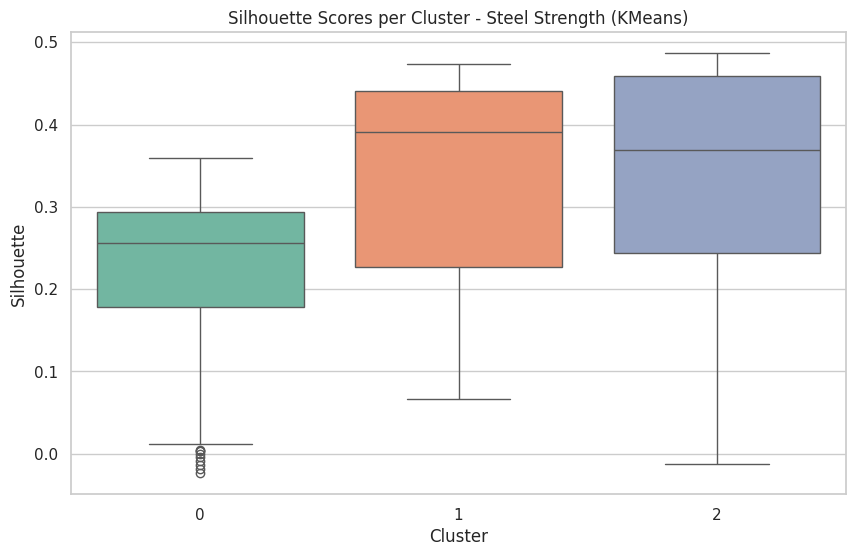

In [25]:
# %% Cell 17: Compute Silhouette Scores for KMeans Clustering on Steel Strength
sil_score_steel = silhouette_score(X_steel, labels_steel)
print("Silhouette Score for Steel Strength (KMeans):", sil_score_steel)
sample_sil_steel = silhouette_samples(X_steel, labels_steel)
df_steel_sil = pd.DataFrame({"Silhouette": sample_sil_steel, "Cluster": labels_steel})
plt.figure()
sns.boxplot(x="Cluster", y="Silhouette", data=df_steel_sil, palette="Set2")
plt.title("Silhouette Scores per Cluster - Steel Strength (KMeans)")
plt.show()

In [27]:
# %% Cell 18: Hierarchical Clustering on Double Perovskites Dataset using Agglomerative Clustering
agg_perov = AgglomerativeClustering(n_clusters=3, linkage='ward') # Removed affinity parameter
labels_agg_perov = agg_perov.fit_predict(X_perov)
df_perovskites_clean['Cluster_Agglomerative'] = labels_agg_perov
print("Agglomerative Clustering Labels (Double Perovskites):", np.unique(labels_agg_perov))

Agglomerative Clustering Labels (Double Perovskites): [0 1 2]


In [29]:
# %% Cell 19: Hierarchical Clustering on Steel Strength Dataset using Agglomerative Clustering
agg_steel = AgglomerativeClustering(n_clusters=3, linkage='ward') # Removed affinity parameter, as it's not needed with 'ward' linkage
labels_agg_steel = agg_steel.fit_predict(X_steel)
df_steel_clean['Cluster_Agglomerative'] = labels_agg_steel
print("Agglomerative Clustering Labels (Steel Strength):", np.unique(labels_agg_steel))

Agglomerative Clustering Labels (Steel Strength): [0 1 2]


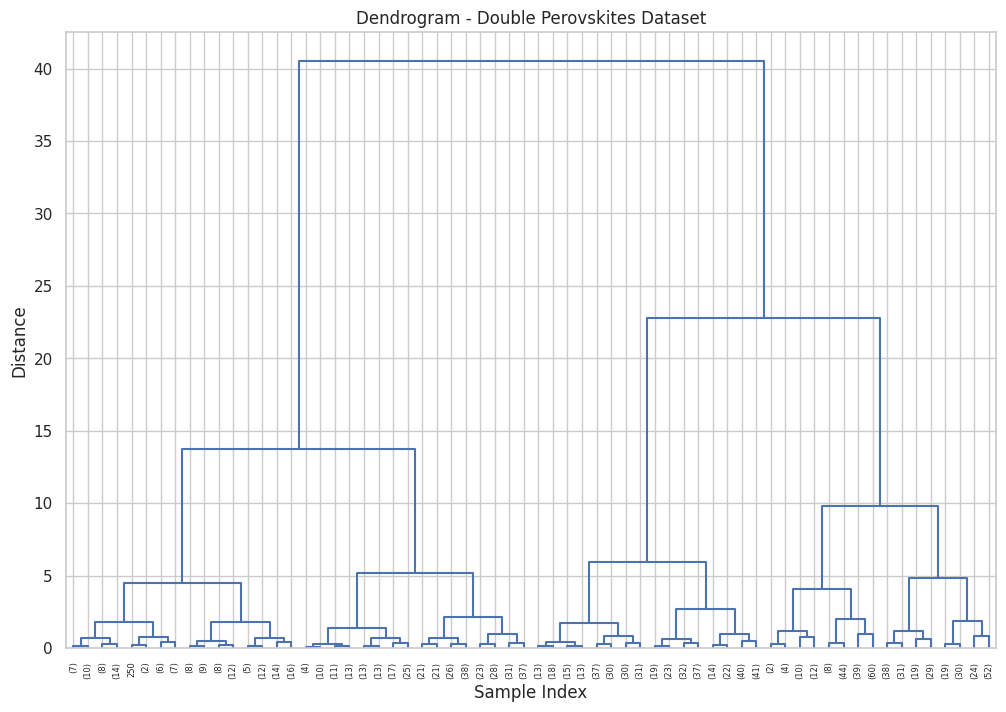

In [30]:
# %% Cell 20: Dendrogram for Double Perovskites Dataset (Hierarchical Clustering)
linked_perov = linkage(X_perov, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linked_perov, truncate_mode='level', p=5, color_threshold=0)
plt.title("Dendrogram - Double Perovskites Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

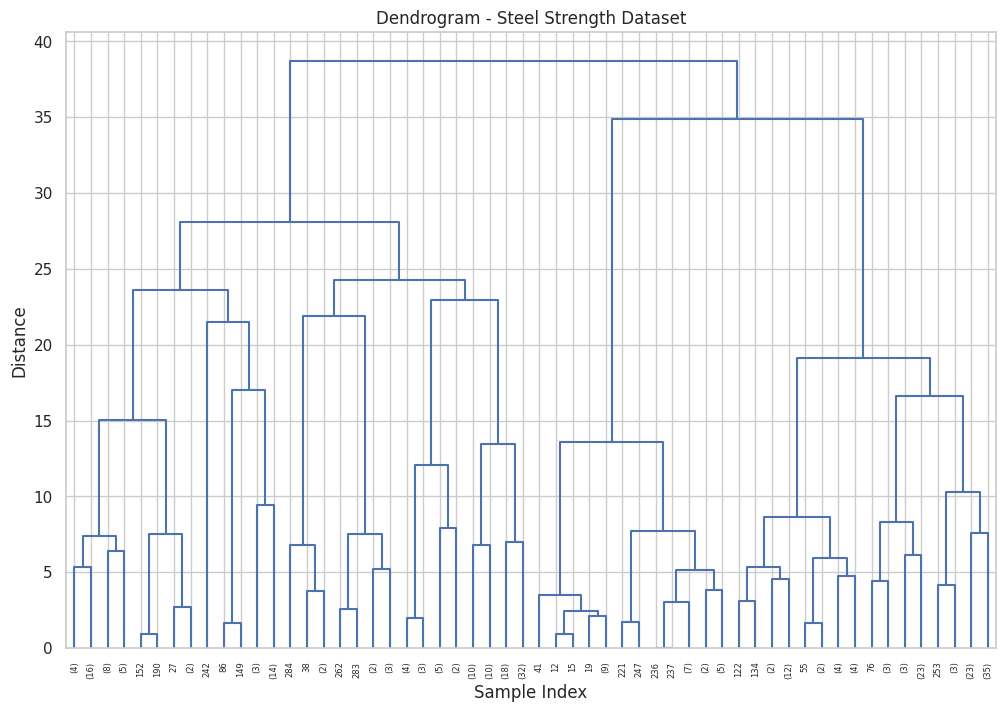

In [31]:
# %% Cell 21: Dendrogram for Steel Strength Dataset (Hierarchical Clustering)
linked_steel = linkage(X_steel, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linked_steel, truncate_mode='level', p=5, color_threshold=0)
plt.title("Dendrogram - Steel Strength Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [32]:
# %% Cell 22: PCA Visualization of Agglomerative Clustering on Double Perovskites
df_perov_pca["Agg_Cluster"] = labels_agg_perov
plt.figure()
sns.scatterplot(x="PC1", y="PC2", hue="Agg_Cluster", data=df_perov_pca, palette="Dark2", s=100)
plt.title("Agglomerative Clustering (Double Perovskites) - PCA Projection")
plt.show()

ValueError: Could not interpret value `PC2` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

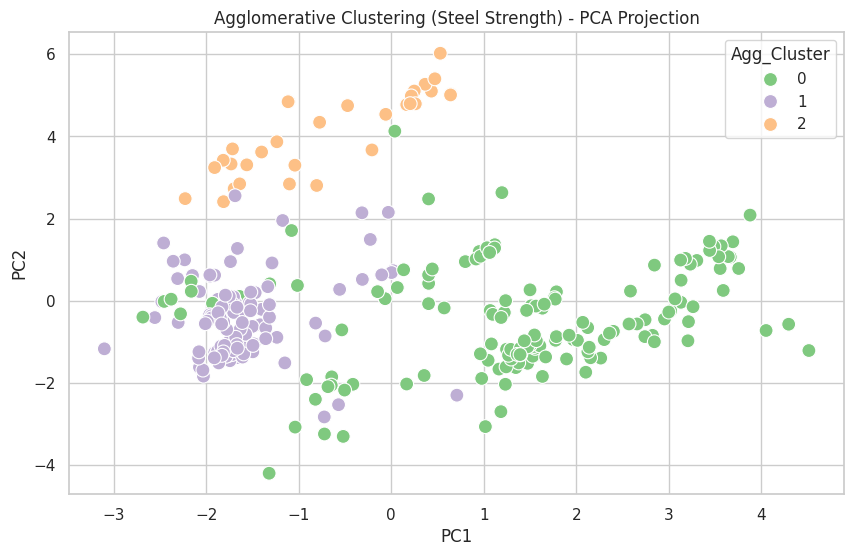

In [33]:
# %% Cell 23: PCA Visualization of Agglomerative Clustering on Steel Strength
df_steel_pca["Agg_Cluster"] = labels_agg_steel
plt.figure()
sns.scatterplot(x="PC1", y="PC2", hue="Agg_Cluster", data=df_steel_pca, palette="Accent", s=100)
plt.title("Agglomerative Clustering (Steel Strength) - PCA Projection")
plt.show()

Silhouette Score for Agglomerative Clustering (Double Perovskites): 0.5167257576798754


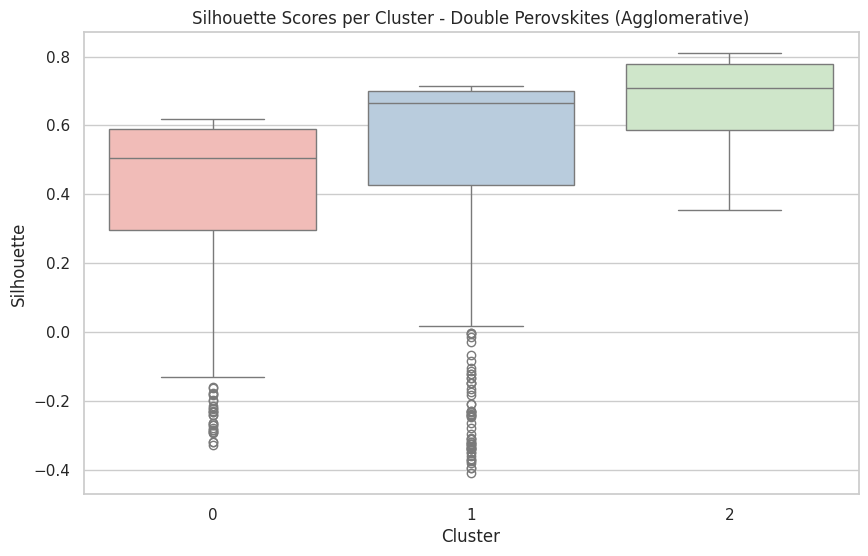

In [34]:
# %% Cell 24: Silhouette Analysis for Agglomerative Clustering on Double Perovskites
sil_score_agg_perov = silhouette_score(X_perov, labels_agg_perov)
print("Silhouette Score for Agglomerative Clustering (Double Perovskites):", sil_score_agg_perov)
sample_sil_agg_perov = silhouette_samples(X_perov, labels_agg_perov)
df_agg_perov_sil = pd.DataFrame({"Silhouette": sample_sil_agg_perov, "Cluster": labels_agg_perov})
plt.figure()
sns.boxplot(x="Cluster", y="Silhouette", data=df_agg_perov_sil, palette="Pastel1")
plt.title("Silhouette Scores per Cluster - Double Perovskites (Agglomerative)")
plt.show()

Silhouette Score for Agglomerative Clustering (Steel Strength): 0.24843082255889692


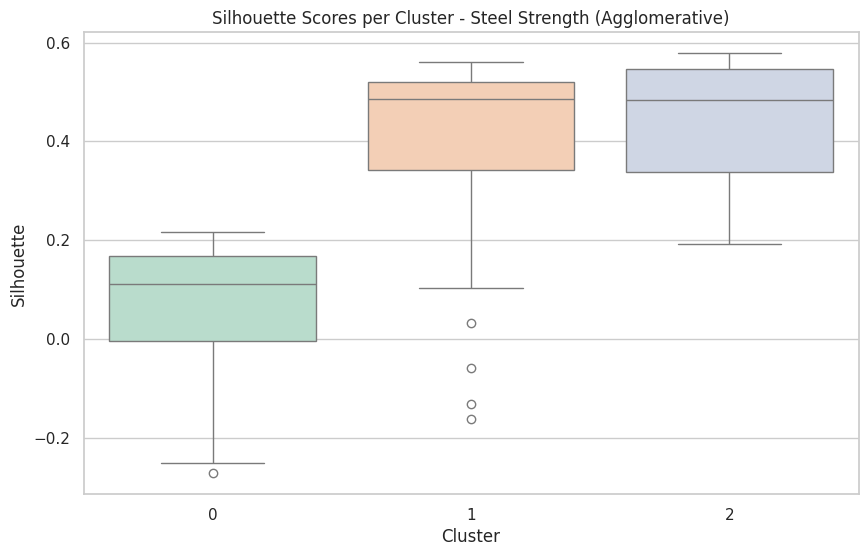

In [35]:
# %% Cell 25: Silhouette Analysis for Agglomerative Clustering on Steel Strength
sil_score_agg_steel = silhouette_score(X_steel, labels_agg_steel)
print("Silhouette Score for Agglomerative Clustering (Steel Strength):", sil_score_agg_steel)
sample_sil_agg_steel = silhouette_samples(X_steel, labels_agg_steel)
df_agg_steel_sil = pd.DataFrame({"Silhouette": sample_sil_agg_steel, "Cluster": labels_agg_steel})
plt.figure()
sns.boxplot(x="Cluster", y="Silhouette", data=df_agg_steel_sil, palette="Pastel2")
plt.title("Silhouette Scores per Cluster - Steel Strength (Agglomerative)")
plt.show()

In [36]:
# %% Cell 26: Compare KMeans and Agglomerative Clustering for Double Perovskites
df_compare_perov = df_perovskites_clean.copy()
print("Double Perovskites Clustering Comparison:")
print(df_compare_perov[['Cluster_KMeans', 'Cluster_Agglomerative']].head(15))
plt.figure()
sns.scatterplot(x=df_perov_pca["PC1"], y=df_perov_pca["PC2"], hue=df_compare_perov["Cluster_KMeans"], palette="Set1", style=df_compare_perov["Cluster_Agglomerative"], s=100)
plt.title("Comparison of KMeans and Agglomerative Clusters - Double Perovskites")
plt.show()

Double Perovskites Clustering Comparison:
    Cluster_KMeans  Cluster_Agglomerative
0                0                      2
1                0                      2
2                0                      2
3                0                      2
4                1                      1
5                0                      2
6                0                      2
7                0                      2
8                0                      2
9                0                      2
10               0                      0
11               0                      2
12               0                      2
13               0                      1
14               1                      1


KeyError: 'PC2'

<Figure size 1000x600 with 0 Axes>

Steel Strength Clustering Comparison:
    Cluster_KMeans  Cluster_Agglomerative
0                2                      2
1                0                      0
3                2                      2
4                2                      2
5                0                      0
6                2                      2
7                0                      0
8                0                      0
9                0                      0
10               2                      2
11               2                      2
12               0                      0
13               2                      2
14               0                      0
15               0                      0


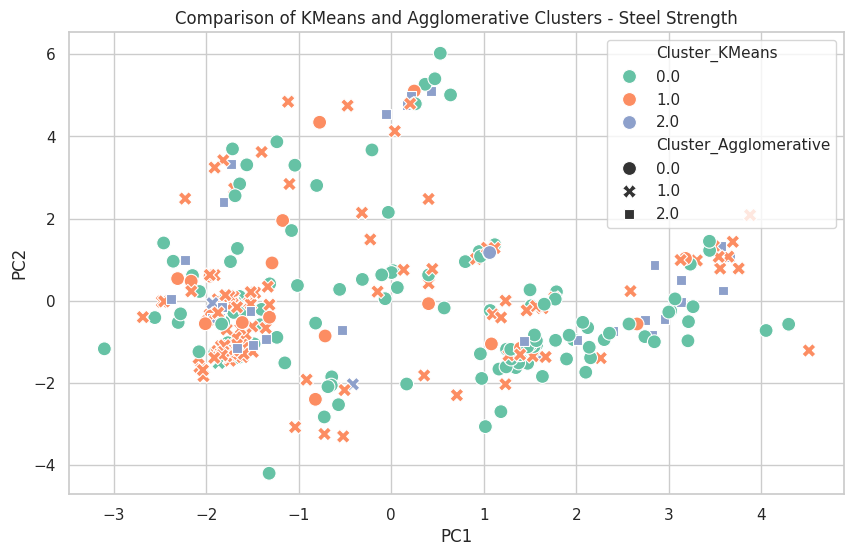

In [38]:
# %% Cell 27: Compare KMeans and Agglomerative Clustering for Steel Strength
df_compare_steel = df_steel_clean.copy()
print("Steel Strength Clustering Comparison:")
print(df_compare_steel[['Cluster_KMeans', 'Cluster_Agglomerative']].head(15))
plt.figure()
sns.scatterplot(x=df_steel_pca["PC1"], y=df_steel_pca["PC2"], hue=df_compare_steel["Cluster_KMeans"], palette="Set2", style=df_compare_steel["Cluster_Agglomerative"], s=100)
plt.title("Comparison of KMeans and Agglomerative Clusters - Steel Strength")
plt.show()

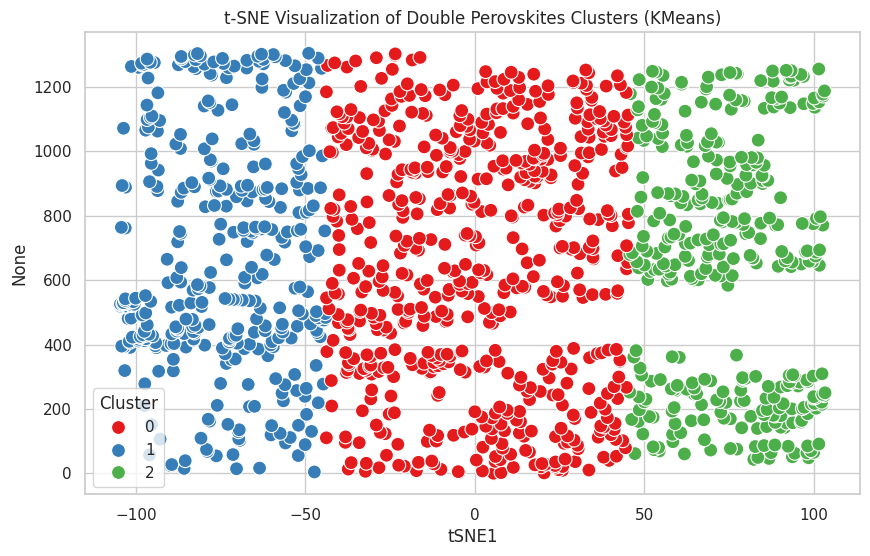

In [42]:
# %% Cell 28: t-SNE Visualization for Double Perovskites Clusters (Optional)
from sklearn.manifold import TSNE

# Change n_components to 1 in TSNE to match the number of features
tsne_perov = TSNE(n_components=1, perplexity=30, random_state=42)

X_tsne_perov = tsne_perov.fit_transform(X_perov)
df_tsne_perov = pd.DataFrame(X_tsne_perov, columns=["tSNE1"]) # Update columns accordingly
df_tsne_perov["Cluster"] = labels_perov
plt.figure()
# Update the scatter plot to use the single t-SNE component (x-axis)
# and a constant value or the index for the y-axis
sns.scatterplot(x="tSNE1", y=df_tsne_perov.index, hue="Cluster", data=df_tsne_perov, palette="Set1", s=100)
plt.title("t-SNE Visualization of Double Perovskites Clusters (KMeans)")
plt.show()

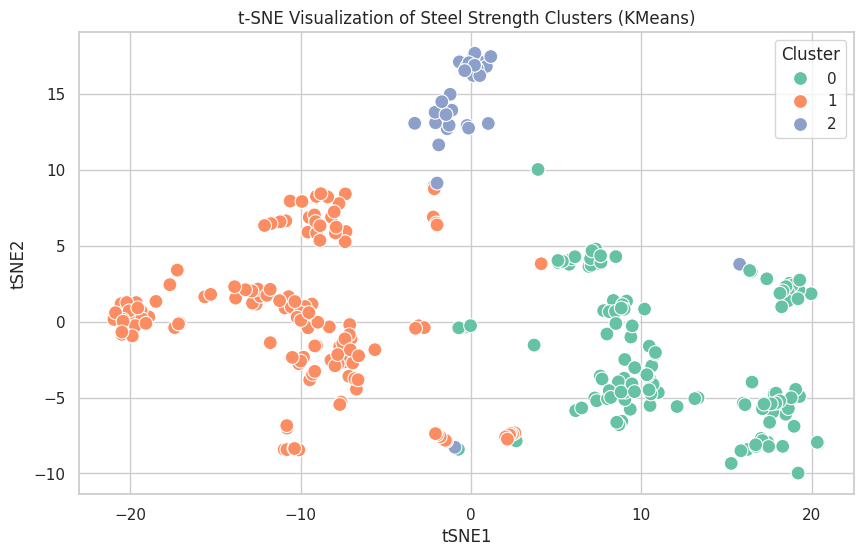

In [40]:
# %% Cell 29: t-SNE Visualization for Steel Strength Clusters (Optional)
tsne_steel = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne_steel = tsne_steel.fit_transform(X_steel)
df_tsne_steel = pd.DataFrame(X_tsne_steel, columns=["tSNE1", "tSNE2"])
df_tsne_steel["Cluster"] = labels_steel
plt.figure()
sns.scatterplot(x="tSNE1", y="tSNE2", hue="Cluster", data=df_tsne_steel, palette="Set2", s=100)
plt.title("t-SNE Visualization of Steel Strength Clusters (KMeans)")
plt.show()

Silhouette Scores for Different k (Double Perovskites): {2: 0.5672324813768033, 3: 0.5546798655736791, 4: 0.5774728480380164, 5: 0.5643343829752538, 6: 0.568269110643202, 7: 0.5548232870624658, 8: 0.5470687658021824, 9: 0.5548597379402052}


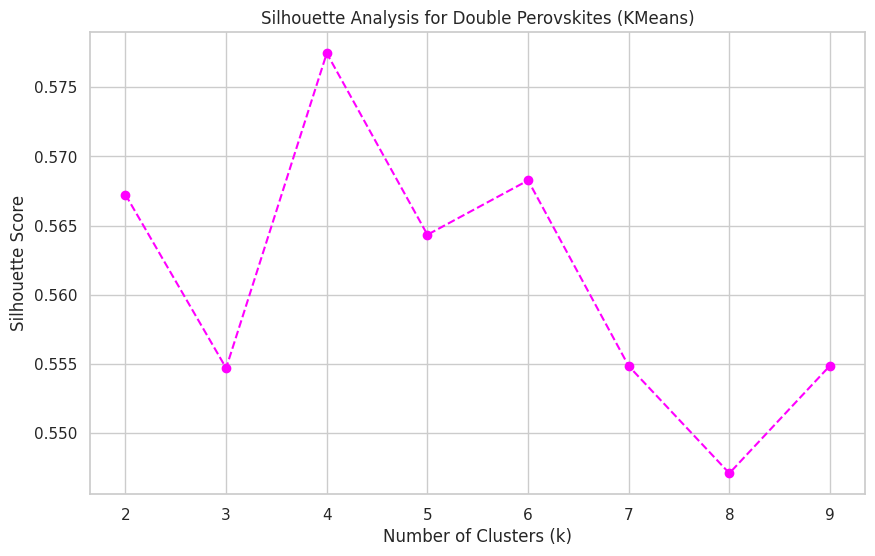

In [41]:
# %% Cell 30: Explore Different Numbers of Clusters for KMeans on Double Perovskites
silhouette_scores = {}
for k in range(2, 10):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    labels_temp = kmeans_temp.fit_predict(X_perov)
    score = silhouette_score(X_perov, labels_temp)
    silhouette_scores[k] = score
print("Silhouette Scores for Different k (Double Perovskites):", silhouette_scores)
plt.figure()
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', linestyle='--', color='magenta')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Double Perovskites (KMeans)")
plt.xticks(list(silhouette_scores.keys()))
plt.show()


Silhouette Scores for Different k (Steel Strength): {2: 0.23065540093002912, 3: 0.2826350885624815, 4: 0.29425507342753604, 5: 0.27737365938065567, 6: 0.30208245145423684, 7: 0.2825229294430276, 8: 0.2634411940075367, 9: 0.2815178232204431}


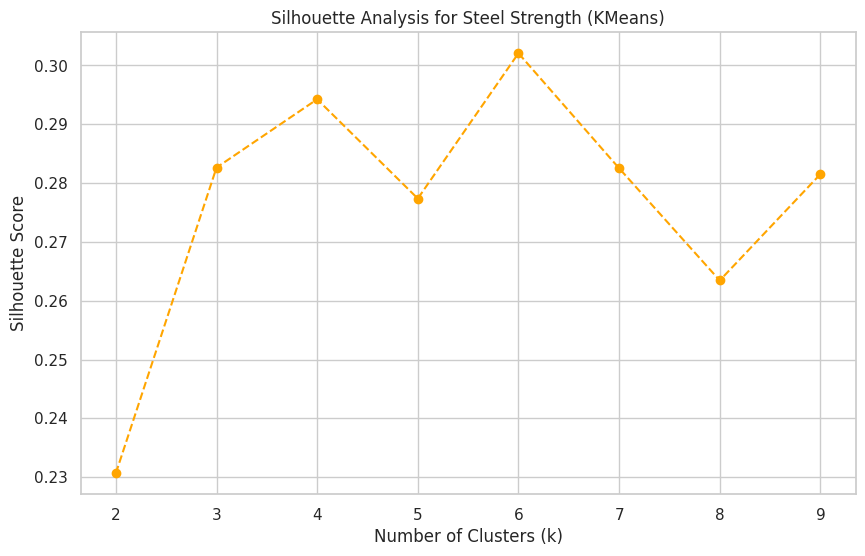

In [43]:
# %% Cell 31: Explore Different Numbers of Clusters for KMeans on Steel Strength
silhouette_scores_steel = {}
for k in range(2, 10):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    labels_temp = kmeans_temp.fit_predict(X_steel)
    score = silhouette_score(X_steel, labels_temp)
    silhouette_scores_steel[k] = score
print("Silhouette Scores for Different k (Steel Strength):", silhouette_scores_steel)
plt.figure()
plt.plot(list(silhouette_scores_steel.keys()), list(silhouette_scores_steel.values()), marker='o', linestyle='--', color='orange')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Steel Strength (KMeans)")
plt.xticks(list(silhouette_scores_steel.keys()))
plt.show()


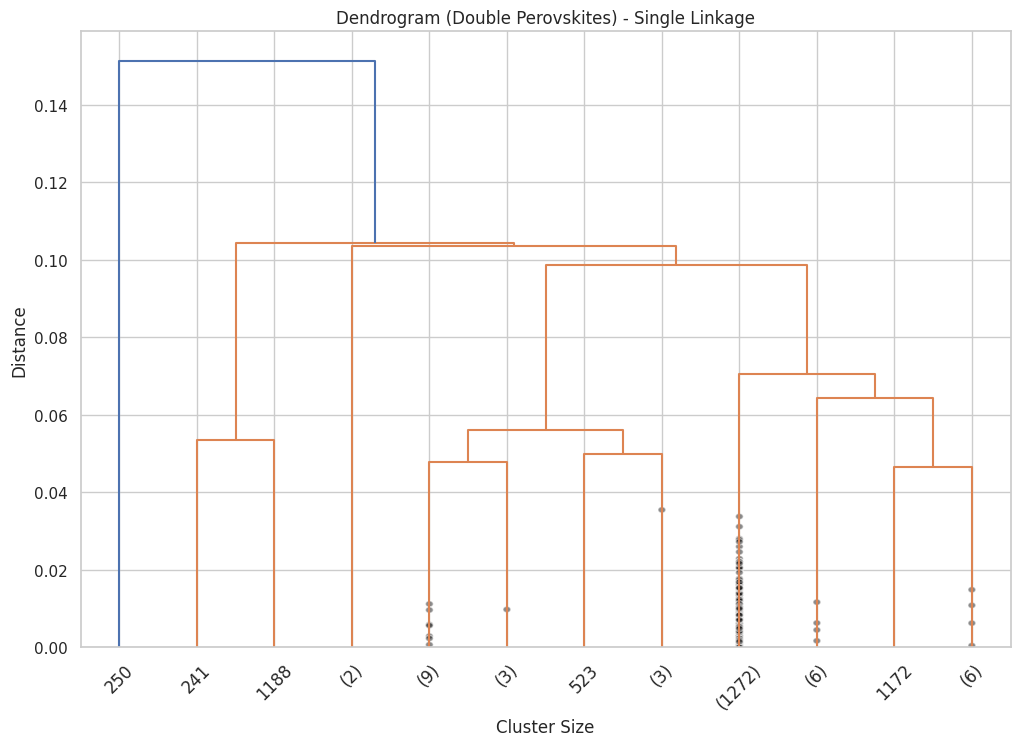

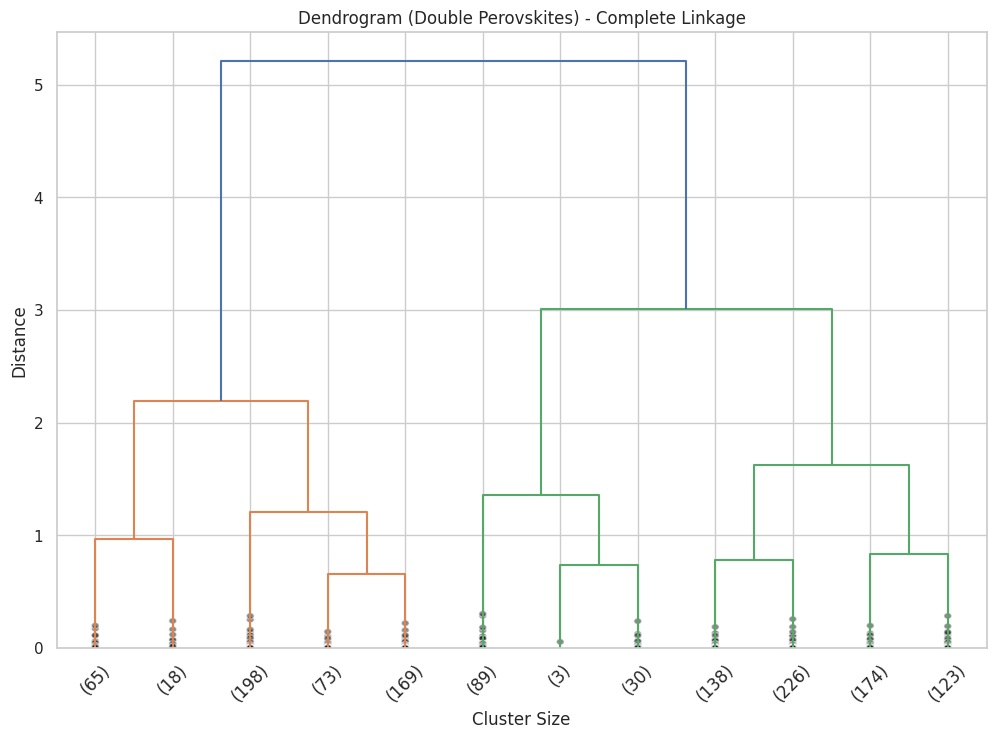

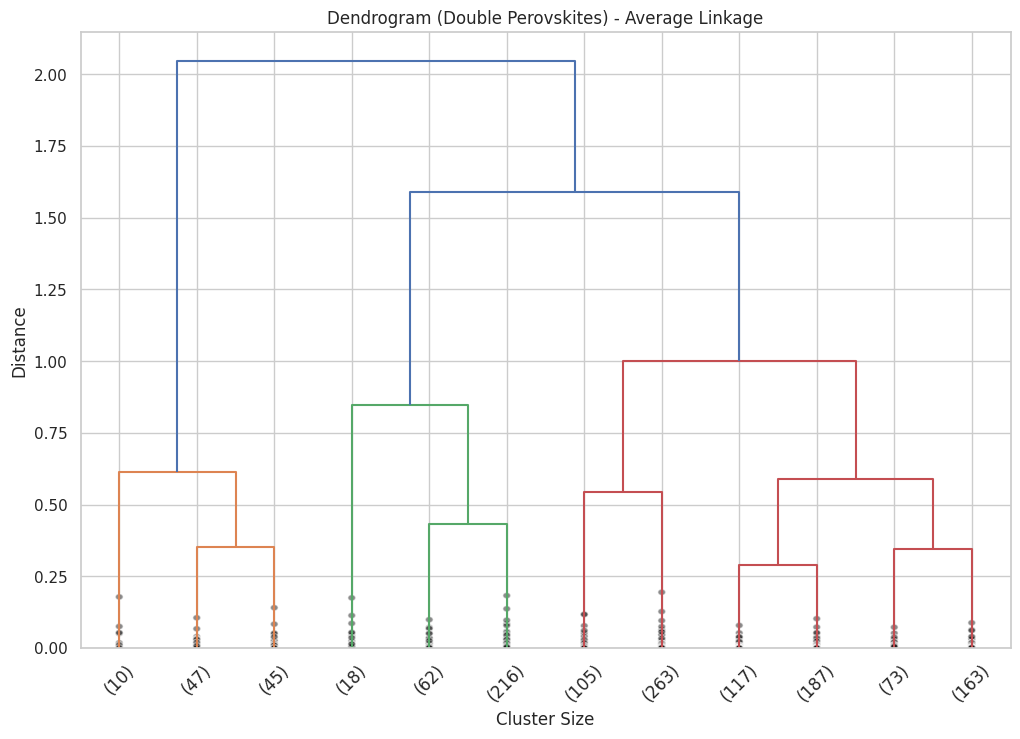

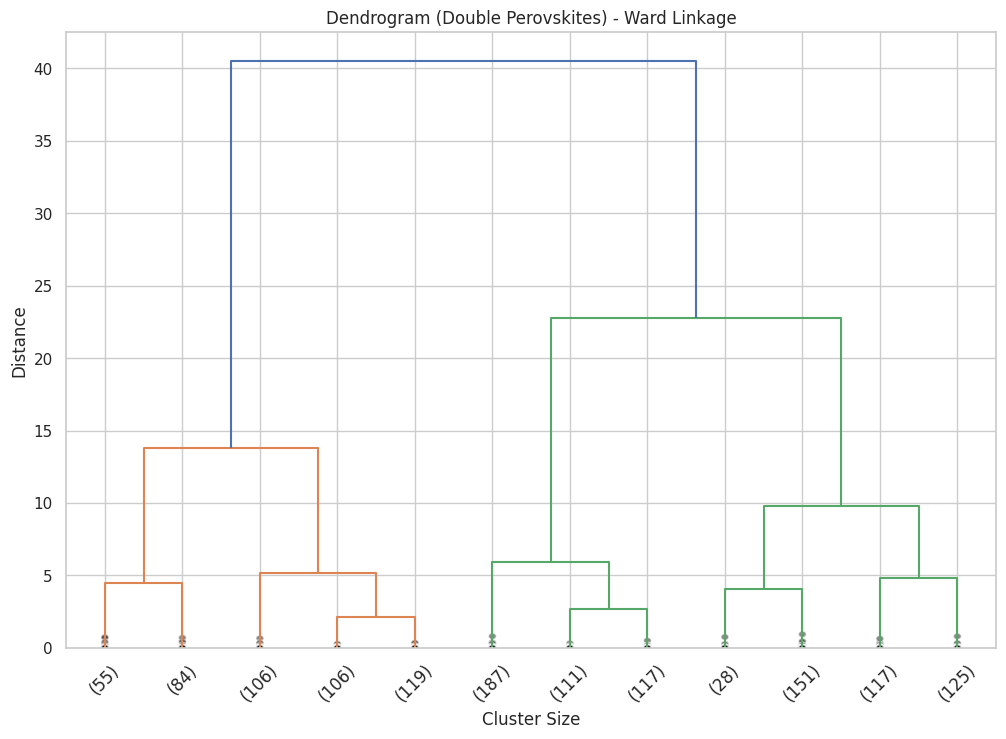

In [44]:
# %% Cell 32: Hierarchical Clustering with Different Linkage Methods for Double Perovskites
linkage_methods = ['single', 'complete', 'average', 'ward']
for method in linkage_methods:
    linked = linkage(X_perov, method=method)
    plt.figure(figsize=(12, 8))
    dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
    plt.title(f"Dendrogram (Double Perovskites) - {method.capitalize()} Linkage")
    plt.xlabel("Cluster Size")
    plt.ylabel("Distance")
    plt.show()

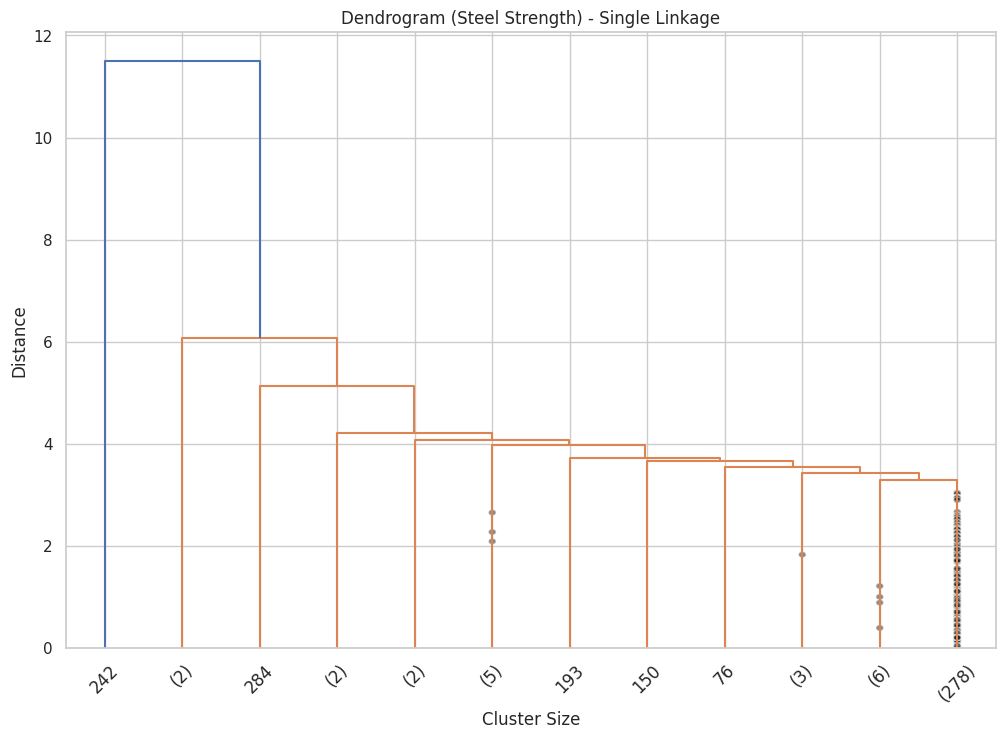

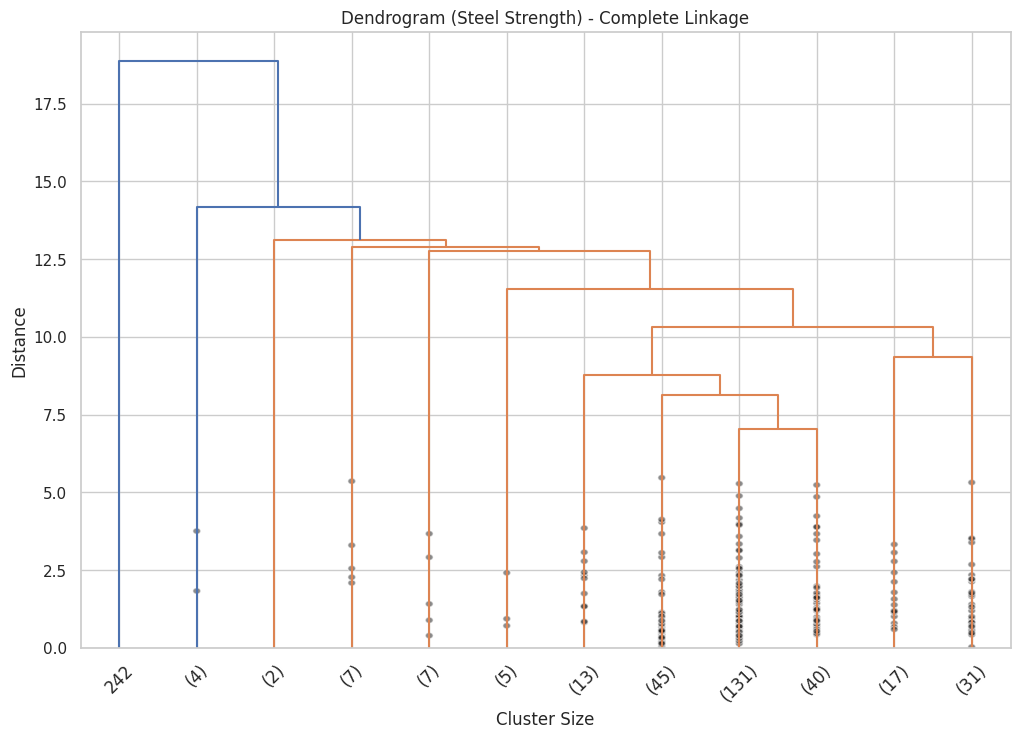

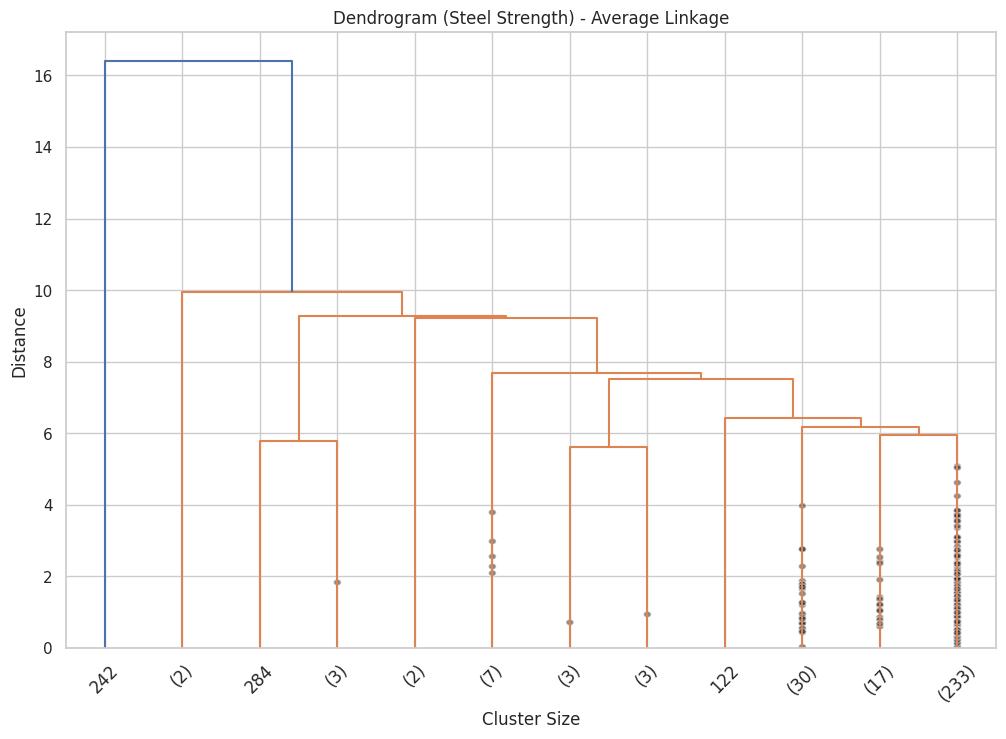

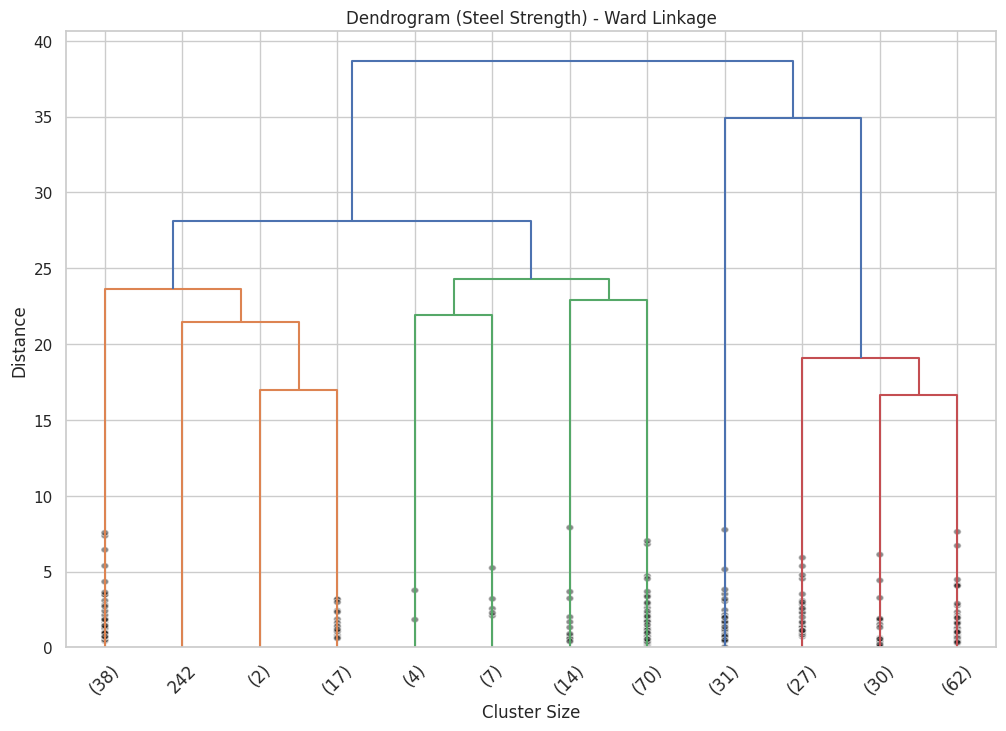

In [45]:
# %% Cell 33: Hierarchical Clustering with Different Linkage Methods for Steel Strength
for method in linkage_methods:
    linked = linkage(X_steel, method=method)
    plt.figure(figsize=(12, 8))
    dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
    plt.title(f"Dendrogram (Steel Strength) - {method.capitalize()} Linkage")
    plt.xlabel("Cluster Size")
    plt.ylabel("Distance")
    plt.show()

In [46]:
# %% Cell 34: Save Clustering Results for Double Perovskites to CSV
df_perovskites_clean.to_csv("double_perovskites_clustered.csv", index=False)
print("Double Perovskites clustering results saved to double_perovskites_clustered.csv")

Double Perovskites clustering results saved to double_perovskites_clustered.csv


In [47]:
# %% Cell 35: Save Clustering Results for Steel Strength to CSV
df_steel_clean.to_csv("steel_strength_clustered.csv", index=False)
print("Steel Strength clustering results saved to steel_strength_clustered.csv")

Steel Strength clustering results saved to steel_strength_clustered.csv


Double Perovskites Cluster Centroids (Original Scale):
   gap gllbsc
0    4.070277
1    2.049371
2    5.961210


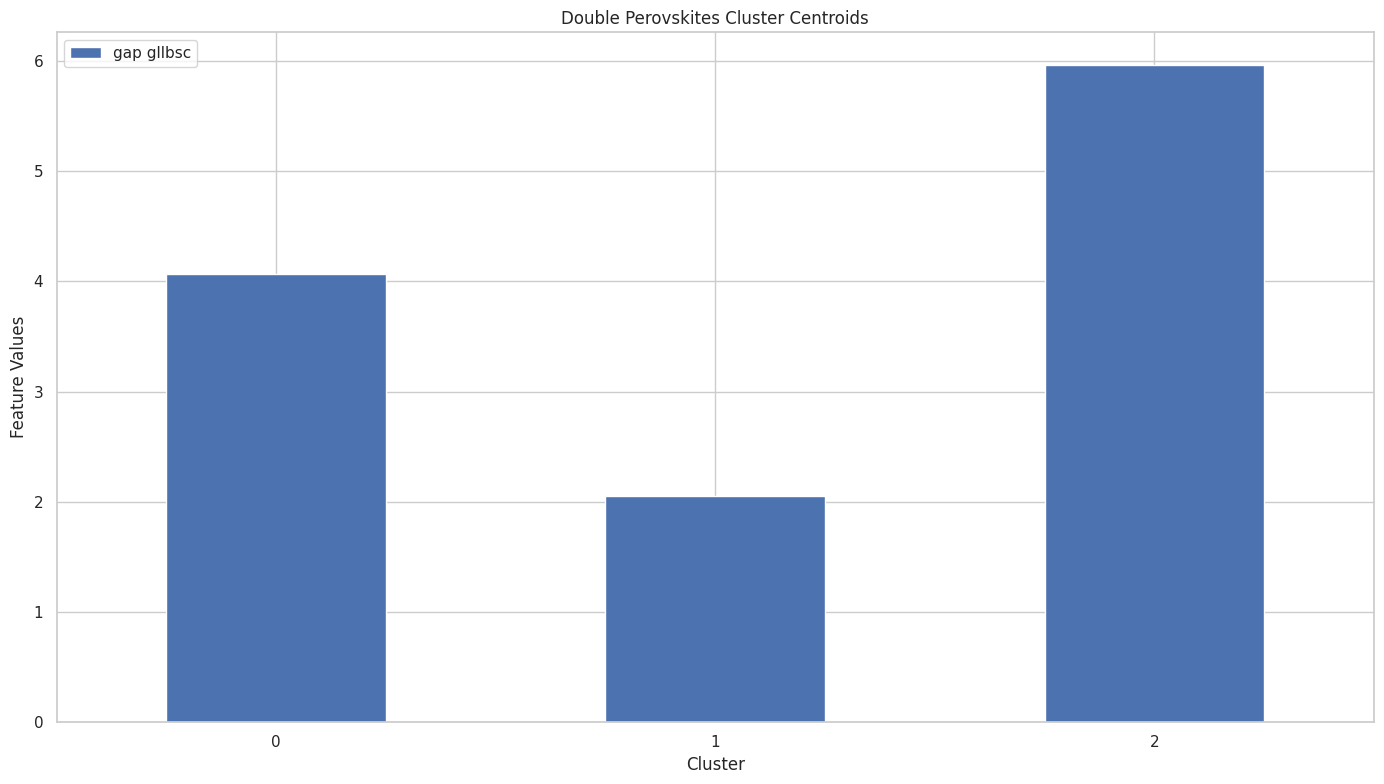

In [48]:
# %% Cell 36: Extra Analysis - Visualize Cluster Centroids for KMeans on Double Perovskites
centroids_perov = kmeans_perov.cluster_centers_
centroids_perov_inv = scaler_perov.inverse_transform(centroids_perov)
df_centroids_perov = pd.DataFrame(centroids_perov_inv, columns=df_perovskites_numeric.columns)
print("Double Perovskites Cluster Centroids (Original Scale):")
print(df_centroids_perov)
df_centroids_perov.plot(kind='bar', figsize=(14, 8))
plt.title("Double Perovskites Cluster Centroids")
plt.xlabel("Cluster")
plt.ylabel("Feature Values")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Steel Strength Cluster Centroids (Original Scale):
          c        mn        si         cr         ni        mo         v  \
0  0.199846  0.132692  0.240538  10.352269   2.688308  3.110462  0.323615   
1  0.023650  0.199197  0.237372   7.807080  10.852920  2.599270  0.039416   
2  0.013611  0.027778  0.142778   0.010000  17.514167  2.493056  0.252222   

          n        nb         co         w        al        ti  \
0  0.012769  0.045462  11.868769  0.278077  0.031923  0.005692   
1  0.000511  0.016131   2.528759  0.077080  0.460219  0.241752   
2  0.000000  0.079167   5.894444  0.092500  0.130000  1.612500   

   yield strength  tensile strength  elongation  
0     1432.625385       1843.343846   12.842308  
1     1253.775182       1332.597080   16.521168  
2     1961.969444       2057.558333    8.647222  


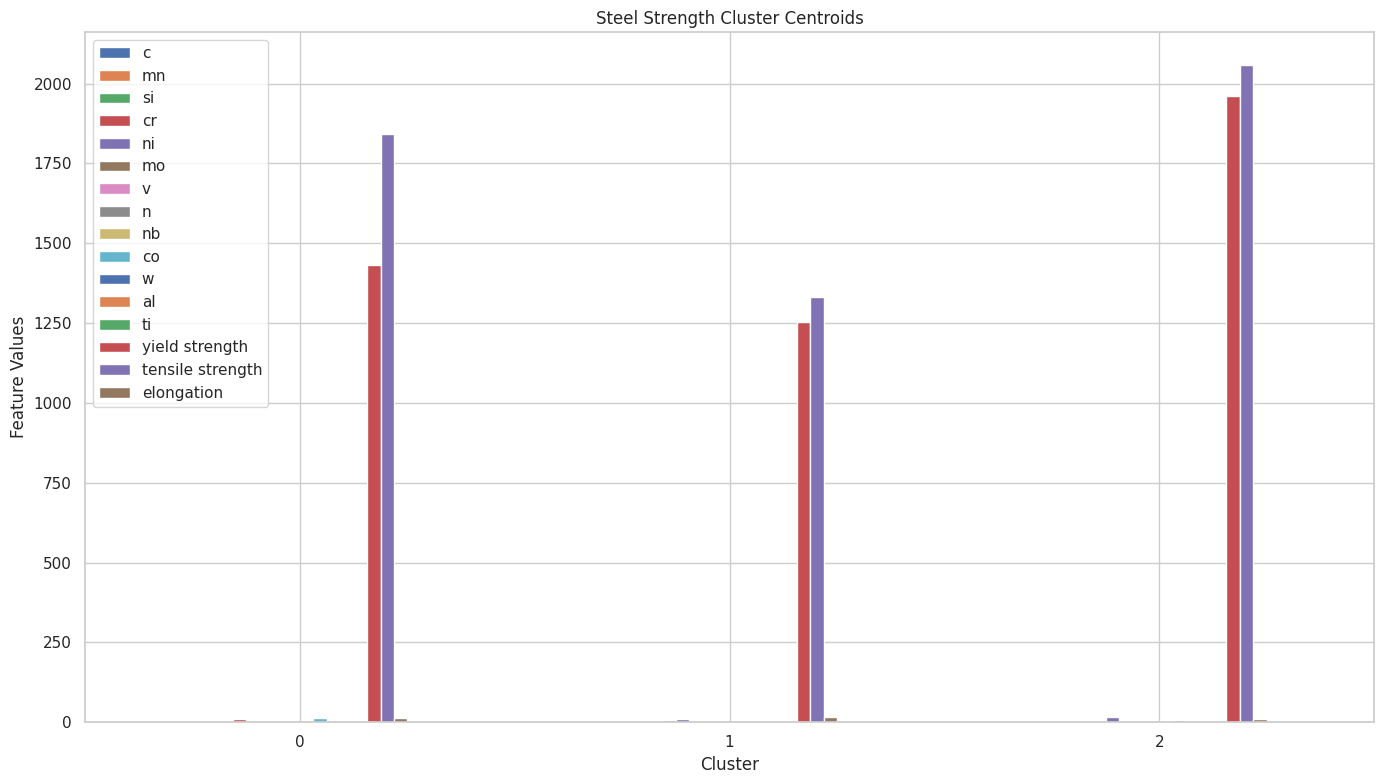

In [49]:
# %% Cell 37: Extra Analysis - Visualize Cluster Centroids for KMeans on Steel Strength
centroids_steel = kmeans_steel.cluster_centers_
centroids_steel_inv = scaler_steel.inverse_transform(centroids_steel)
df_centroids_steel = pd.DataFrame(centroids_steel_inv, columns=df_steel_numeric.columns)
print("Steel Strength Cluster Centroids (Original Scale):")
print(df_centroids_steel)
df_centroids_steel.plot(kind='bar', figsize=(14, 8))
plt.title("Steel Strength Cluster Centroids")
plt.xlabel("Cluster")
plt.ylabel("Feature Values")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


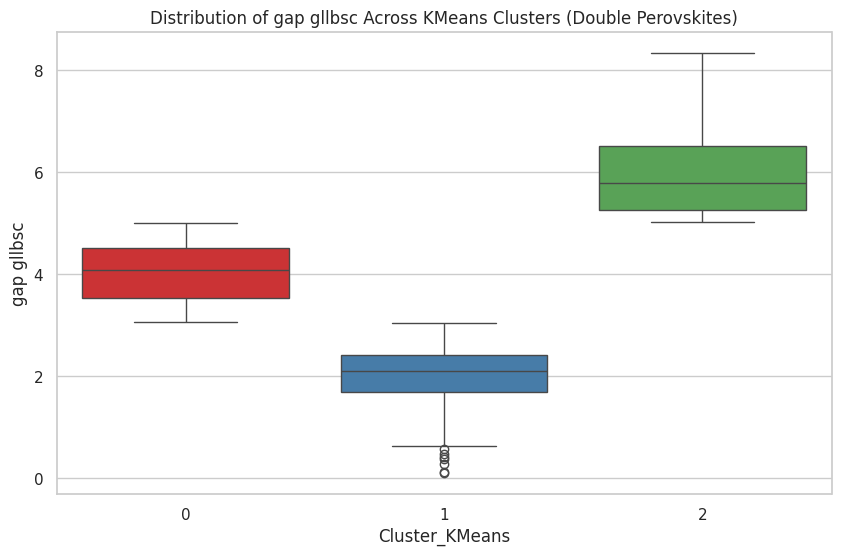

In [50]:
# %% Cell 38: Detailed Comparison of Feature Distributions Across Clusters in Double Perovskites
for feature in df_perovskites_numeric.columns:
    plt.figure()
    sns.boxplot(x='Cluster_KMeans', y=feature, data=df_perovskites_clean, palette="Set1")
    plt.title(f"Distribution of {feature} Across KMeans Clusters (Double Perovskites)")
    plt.show()

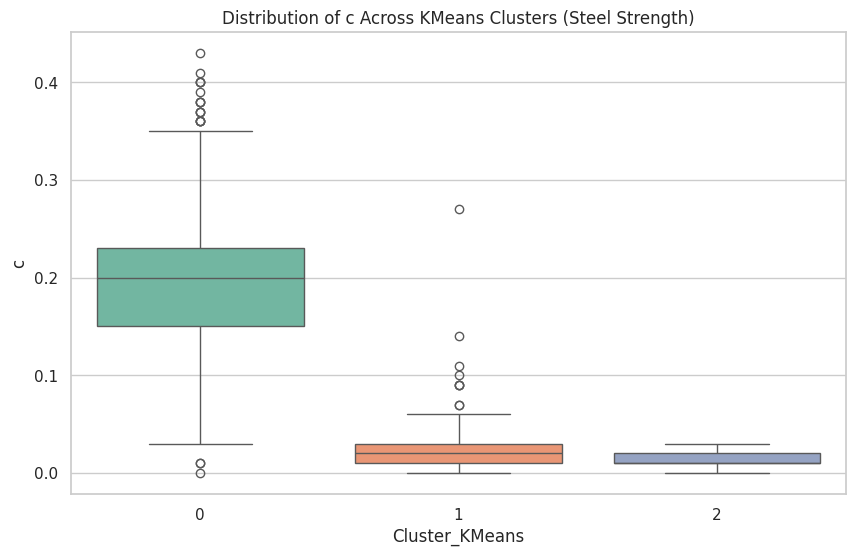

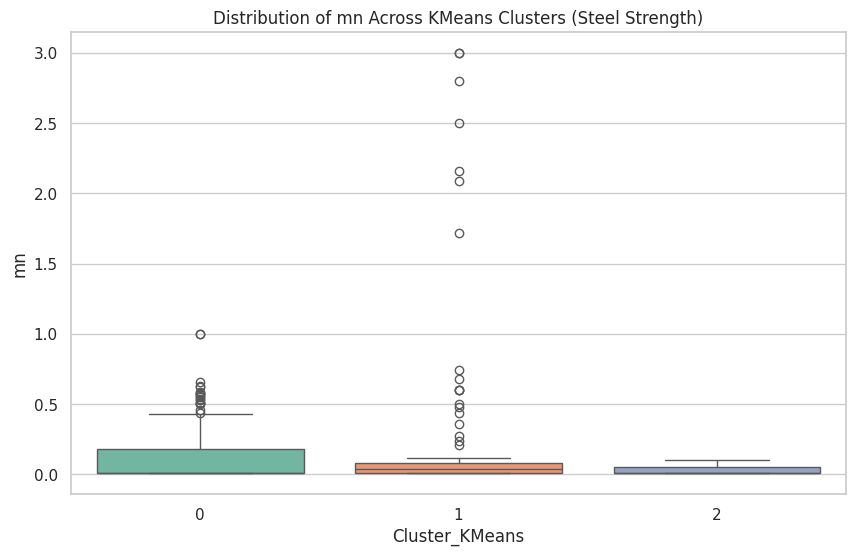

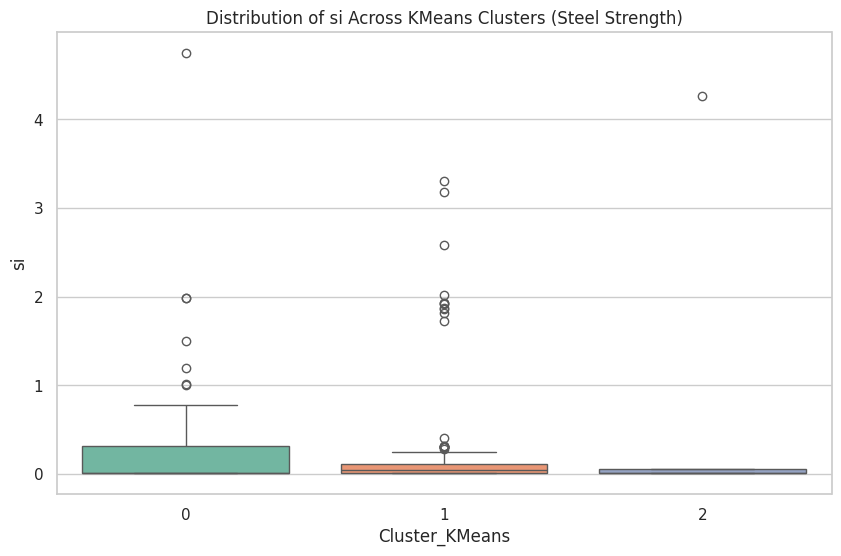

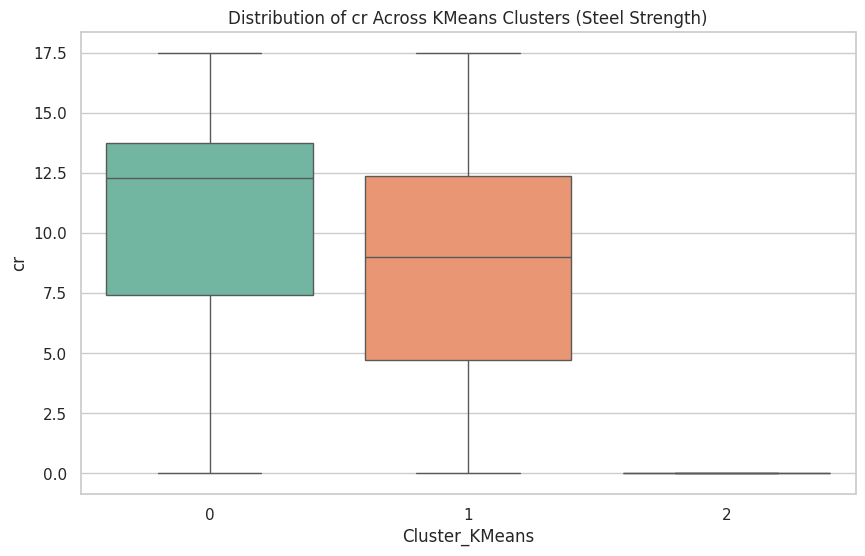

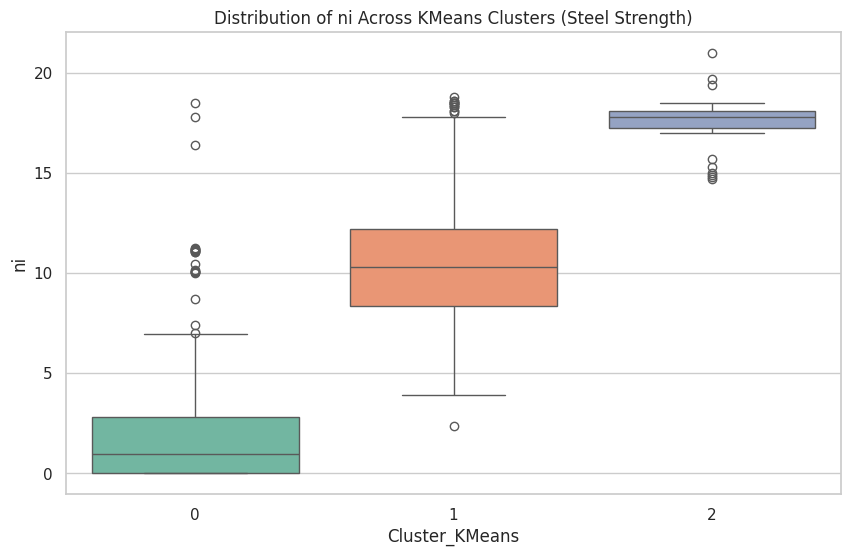

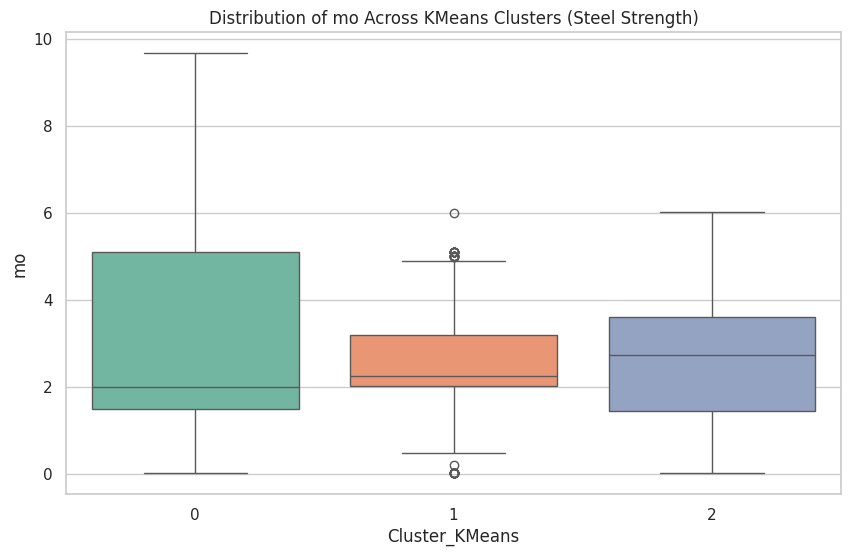

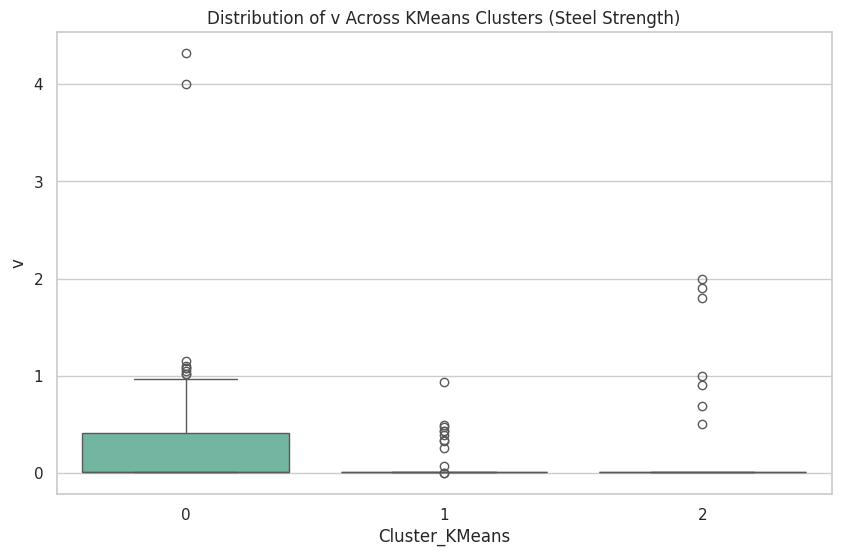

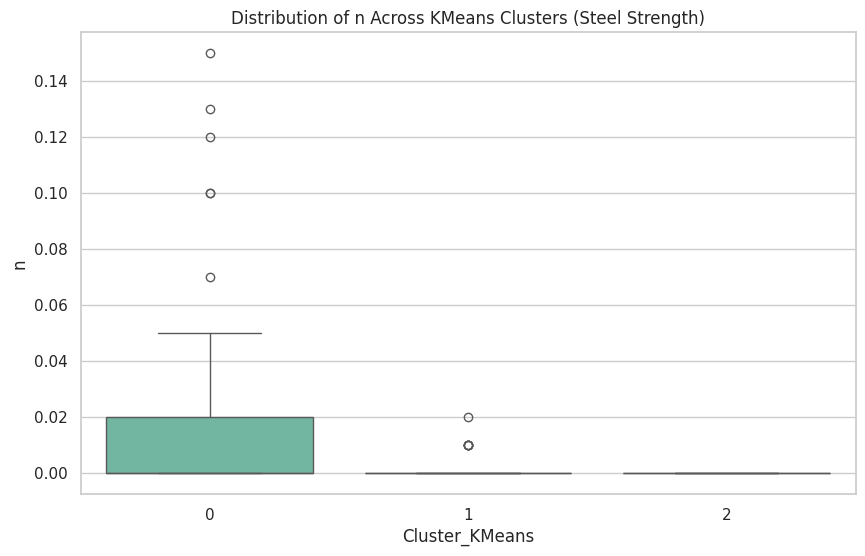

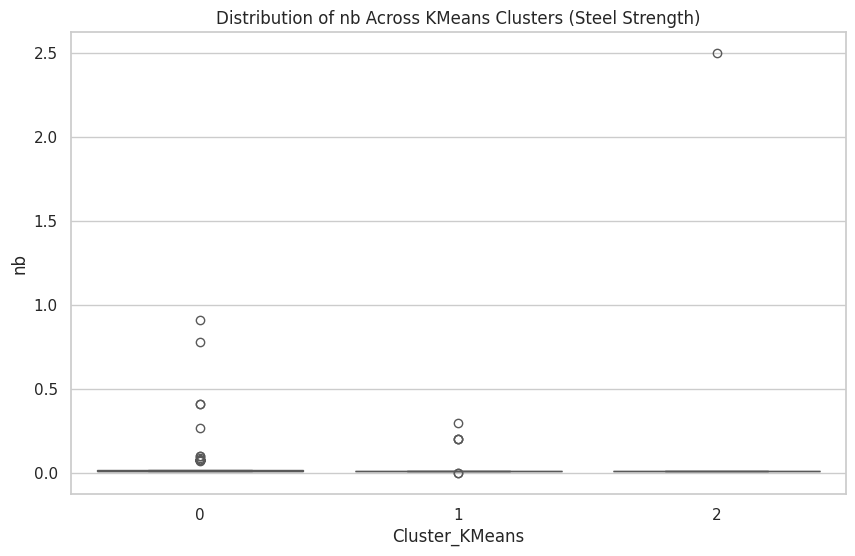

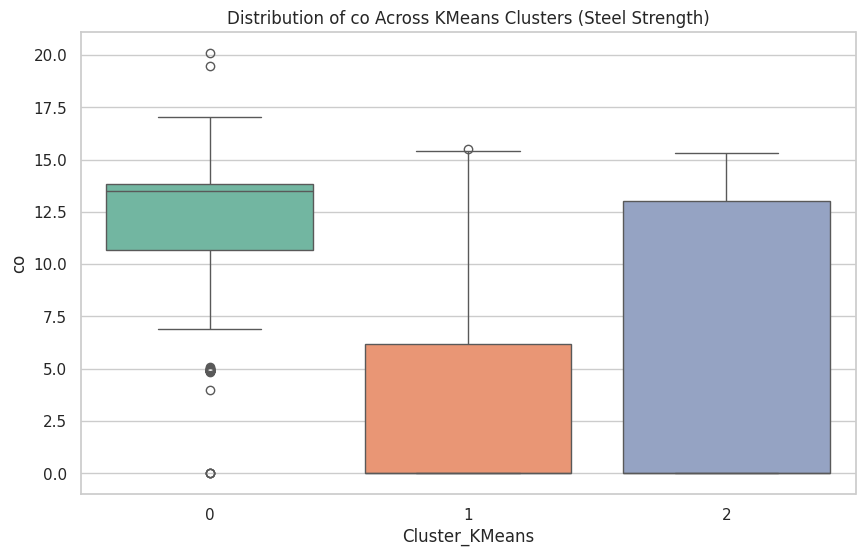

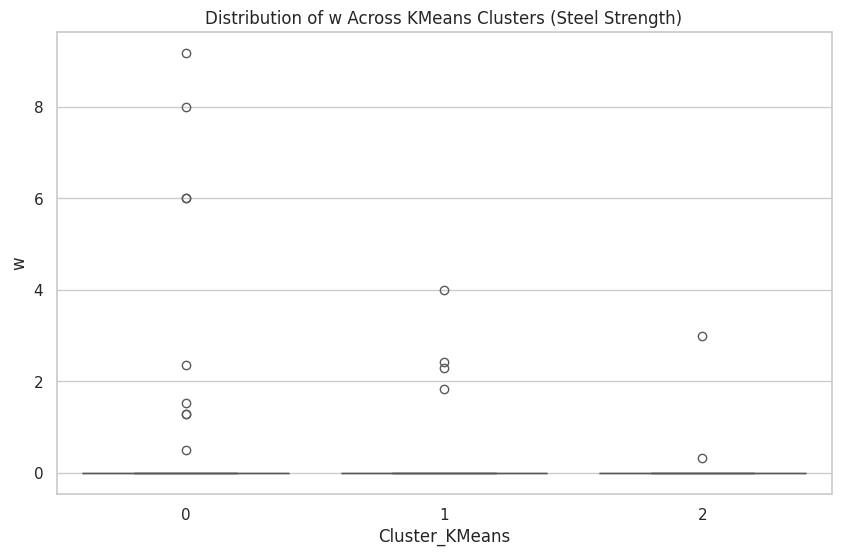

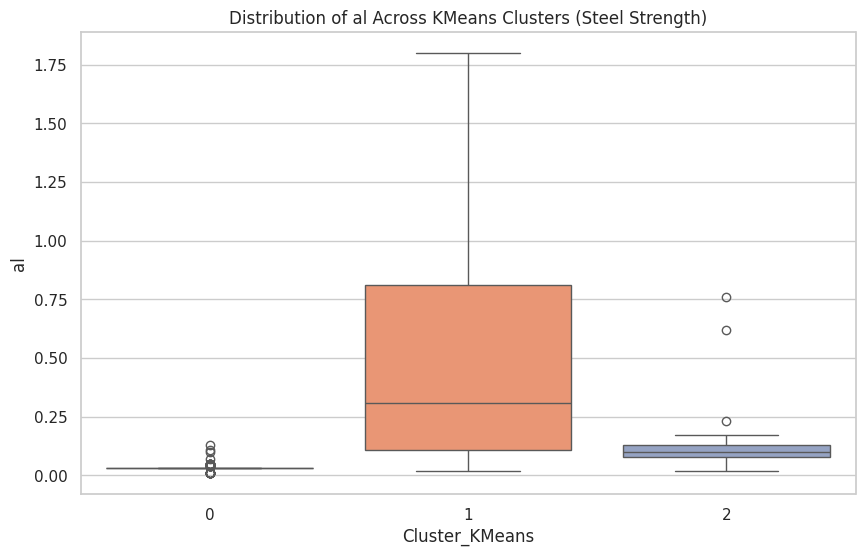

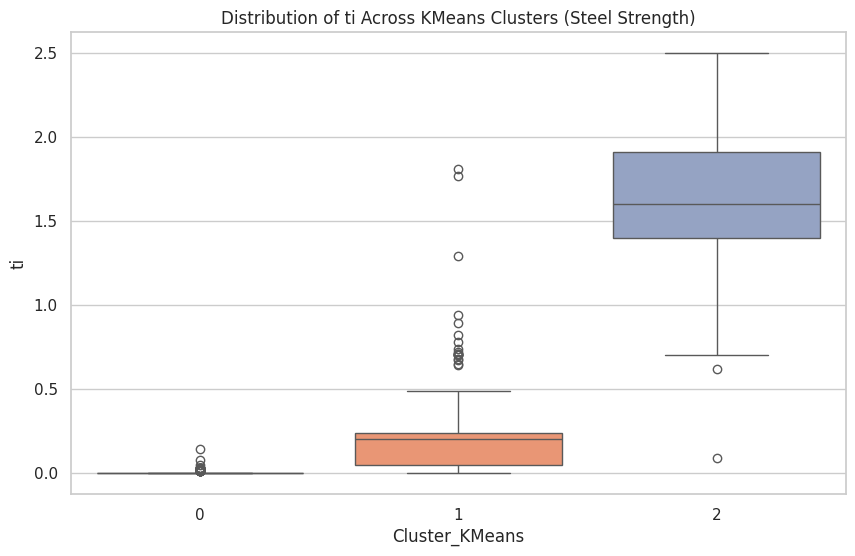

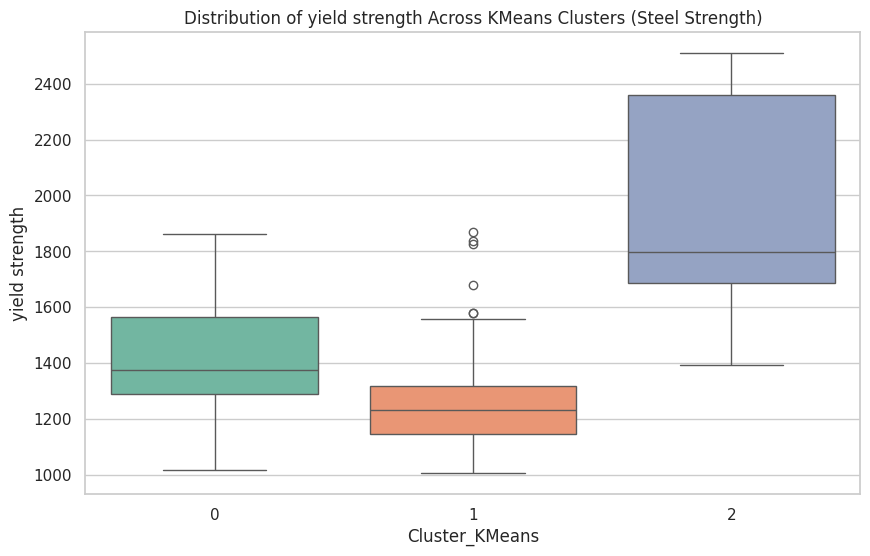

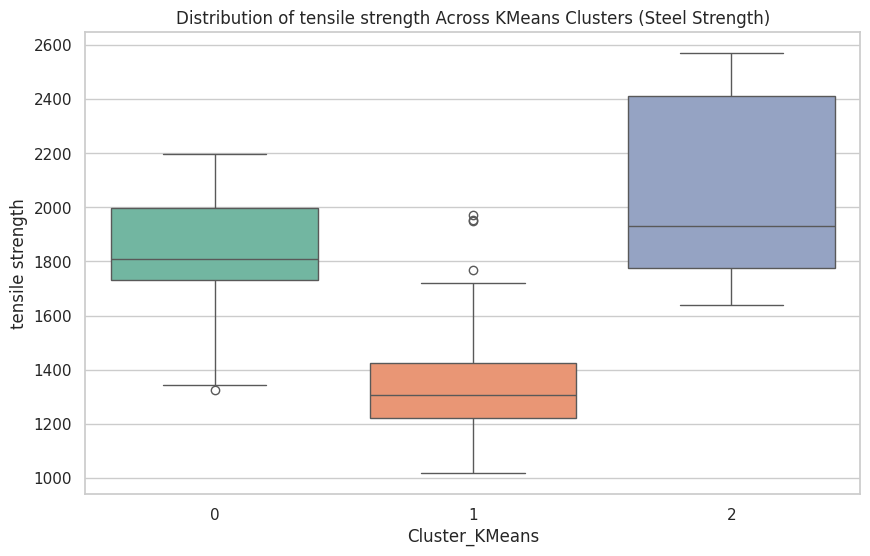

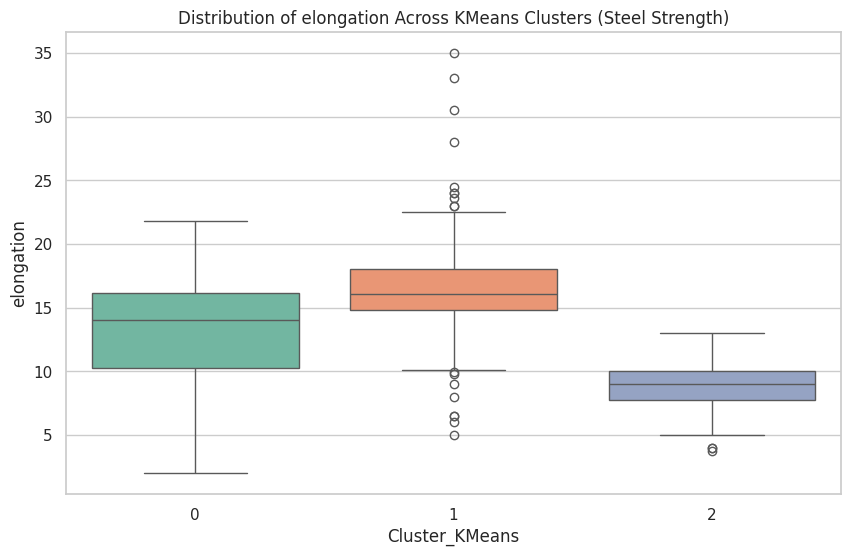

In [51]:
# %% Cell 39: Detailed Comparison of Feature Distributions Across Clusters in Steel Strength
for feature in df_steel_numeric.columns:
    plt.figure()
    sns.boxplot(x='Cluster_KMeans', y=feature, data=df_steel_clean, palette="Set2")
    plt.title(f"Distribution of {feature} Across KMeans Clusters (Steel Strength)")
    plt.show()

In [52]:
# %% Cell 40: Final Summary - Print Cluster Counts and Silhouette Scores for Both Datasets
print("Final Summary for Double Perovskites Dataset:")
print("KMeans Cluster Counts:\n", df_perovskites_clean['Cluster_KMeans'].value_counts())
print("Agglomerative Cluster Counts:\n", df_perovskites_clean['Cluster_Agglomerative'].value_counts())
print("KMeans Silhouette Score:", sil_score_perov)
print("Agglomerative Silhouette Score:", sil_score_agg_perov)

print("\nFinal Summary for Steel Strength Dataset:")
print("KMeans Cluster Counts:\n", df_steel_clean['Cluster_KMeans'].value_counts())
print("Agglomerative Cluster Counts:\n", df_steel_clean['Cluster_Agglomerative'].value_counts())
print("KMeans Silhouette Score:", sil_score_steel)
print("Agglomerative Silhouette Score:", sil_score_agg_steel)

print("\nClustering analysis complete. Detailed clustering results have been generated, visualized, and saved.")

Final Summary for Double Perovskites Dataset:
KMeans Cluster Counts:
 Cluster_KMeans
0    588
1    364
2    354
Name: count, dtype: int64
Agglomerative Cluster Counts:
 Cluster_Agglomerative
0    470
1    421
2    415
Name: count, dtype: int64
KMeans Silhouette Score: 0.5546798655736791
Agglomerative Silhouette Score: 0.5167257576798754

Final Summary for Steel Strength Dataset:
KMeans Cluster Counts:
 Cluster_KMeans
1    137
0    130
2     36
Name: count, dtype: int64
Agglomerative Cluster Counts:
 Cluster_Agglomerative
0    153
1    119
2     31
Name: count, dtype: int64
KMeans Silhouette Score: 0.2826350885624815
Agglomerative Silhouette Score: 0.24843082255889692

Clustering analysis complete. Detailed clustering results have been generated, visualized, and saved.
